# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
!pip install hdbscan optuna -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 10.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import hdbscan
import scipy.cluster.hierarchy as shc
import plotly.graph_objects as go
import kagglehub
import umap
import lightgbm as lgb
import optuna

from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, DBSCAN, OPTICS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer

warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
!wget --no-check-certificate https://raw.githubusercontent.com/rioooranteai/data-analytics---modeling/main/Sugar%20Consumption%20Clustering%20%26%20Classificatoin/Dataset/sugar_consumption_dataset.csv -O "/content/Dataset_inisiasi.csv"

--2025-04-13 03:20:22--  https://raw.githubusercontent.com/rioooranteai/data-analytics---modeling/main/Sugar%20Consumption%20Clustering%20%26%20Classificatoin/Dataset/sugar_consumption_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3639918 (3.5M) [text/plain]
Saving to: ‘/content/Dataset_inisiasi.csv’

/content/Dataset_in 100%[===================>]   3.47M  9.68MB/s    in 0.4s    

2025-04-13 03:20:24 (9.68 MB/s) - ‘/content/Dataset_inisiasi.csv’ saved [3639918/3639918]



In [4]:
df = pd.read_csv("/content/Dataset_inisiasi.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **Memahami Struktur Data**

In [5]:
df.head()

Country  Year Country_Code Continent                   Region  \
0     France  1972          FRA    Europe           Western Europe   
1  Australia  2003          AUS   Oceania  Australia & New Zealand   
2    Germany  1963          DEU    Europe           Western Europe   
3     France  1965          FRA    Europe           Western Europe   
4    Germany  2010          DEU    Europe           Western Europe   

     Population  GDP_Per_Capita  Per_Capita_Sugar_Consumption  \
0  2.617306e+08     8692.631696                     12.827741   
1  1.737965e+08     6859.195960                     21.362632   
2  1.236366e+08    22075.950575                     32.077485   
3  2.989961e+08     3728.027392                     47.648930   
4  7.341531e+06    40420.973962                     23.214343   

   Total_Sugar_Consumption  Sugar_From_Sugarcane  ...  Obesity_Rate  \
0             3.357413e+06             68.422963  ...     34.094017   
1             3.712750e+06             55.432564  ...     16.040118   
2             3.965951e+06             86.466120  ...     14.405741   
3             1.424685e+07             69.806707  ...     38.499271   
4             1.704288e+05             63.772278  ...     36.190977   

   Sugar_Imports  Sugar_Exports  Avg_Retail_Price_Per_Kg  Gov_Tax  \
0   5.401670e+06   2.358929e+06                 3.864020      0.0   
1   3.418790e+06   9.694348e+06                 3.282101      0.0   
2   8.987281e+06   5.451632e+06                 1.097687      0.0   
3   5.179004e+06   8.048500e+06                 2.761297      0.0   
4   6.463439e+06   7.062910e+06                 4.219431      0.0   

   Gov_Subsidies  Education_Campaign  Urbanization_Rate  Climate_Conditions  \
0              0                 0.0          34.503398                   3   
1              0                 0.0          31.783067                   4   
2              0                 0.0          51.551345                   1   
3              0                 0.0          80.386281                   2   
4              0                 1.0          49.701153                   3   

   Sugarcane_Production_Yield  
0                   52.433972  
1                   58.382055  
2                   32.184735  
3                   84.296019  
4                   66.110815  

[5 rows x 26 columns]

In [6]:
df.tail()

Country  Year Country_Code Continent          Region    Population  \
9995   Japan  2013          JPN      Asia       East Asia  1.577296e+08   
9996   Japan  1997          JPN      Asia       East Asia  8.194828e+07   
9997   China  1968          CHN      Asia       East Asia  2.211798e+08   
9998  France  2020          FRA    Europe  Western Europe  1.089609e+08   
9999   China  1990          CHN      Asia       East Asia  2.118221e+07   

      GDP_Per_Capita  Per_Capita_Sugar_Consumption  Total_Sugar_Consumption  \
9995    13292.772553                     52.082820             8.215000e+06   
9996    15062.553443                     59.947295             4.912577e+06   
9997    44077.744031                     21.447386             4.743729e+06   
9998    19327.592671                     35.558519             3.874488e+06   
9999    28039.986398                     67.470909             1.429183e+06   

      Sugar_From_Sugarcane  ...  Obesity_Rate  Sugar_Imports  Sugar_Exports  \
9995             68.735289  ...     23.261105   6.789191e+06   1.760144e+06   
9996             89.760649  ...     38.510142   2.945742e+06   9.403225e+06   
9997             60.228450  ...     31.494902   6.562415e+06   6.828324e+06   
9998             89.151300  ...     22.046038   2.736993e+06   1.877796e+06   
9999             64.568766  ...     21.302099   7.195694e+06   1.698358e+06   

      Avg_Retail_Price_Per_Kg  Gov_Tax  Gov_Subsidies  Education_Campaign  \
9995                 0.546087      0.0              0                 1.0   
9996                 0.719054      0.0              1                 1.0   
9997                 3.786874      0.0              0                 0.0   
9998                 4.711171      0.0              1                 0.0   
9999                 1.088151      0.0              0                 0.0   

      Urbanization_Rate  Climate_Conditions  Sugarcane_Production_Yield  
9995          70.297948                   5                   50.874135  
9996          82.951511                   5                   49.170137  
9997          80.478768                   5                   56.414707  
9998          50.138593                   4                   44.818364  
9999          39.748626                   1                   58.549719  

[5 rows x 26 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       10000 non-null  object 
 1   Year                          10000 non-null  int64  
 2   Country_Code                  10000 non-null  object 
 3   Continent                     10000 non-null  object 
 4   Region                        10000 non-null  object 
 5   Population                    10000 non-null  float64
 6   GDP_Per_Capita                10000 non-null  float64
 7   Per_Capita_Sugar_Consumption  10000 non-null  float64
 8   Total_Sugar_Consumption       10000 non-null  float64
 9   Sugar_From_Sugarcane          10000 non-null  float64
 10  Sugar_From_Beet               10000 non-null  float64
 11  Sugar_From_HFCS               10000 non-null  float64
 12  Sugar_From_Other              10000 non-null  float64
 13  Pr

In [8]:
df.describe()

Year    Population  GDP_Per_Capita  \
count  10000.000000  1.000000e+04    10000.000000   
mean    1991.330300  1.501189e+08    25242.491756   
std       18.424086  8.646170e+07    14193.053646   
min     1960.000000  1.005004e+06      500.417394   
25%     1976.000000  7.434980e+07    13219.345523   
50%     1991.000000  1.500741e+08    25155.568950   
75%     2007.000000  2.250870e+08    37558.130715   
max     2023.000000  2.999917e+08    49997.014954   

       Per_Capita_Sugar_Consumption  Total_Sugar_Consumption  \
count                  10000.000000             1.000000e+04   
mean                      37.626027             5.650157e+06   
std                       18.733654             4.599203e+06   
min                        5.017558             7.387572e+03   
25%                       21.386174             1.882590e+06   
50%                       37.878147             4.369083e+06   
75%                       54.003484             8.484738e+06   
max                       69.991881             2.090366e+07   

       Sugar_From_Sugarcane  Sugar_From_Beet  Sugar_From_HFCS  \
count          10000.000000     10000.000000     10000.000000   
mean              70.028543        22.494559        29.811113   
std               11.481251        10.207287        17.242892   
min               50.005200         5.003532         0.001761   
25%               60.072363        13.544087        14.746013   
50%               70.167342        22.532868        30.101299   
75%               80.007973        31.448762        44.571011   
max               89.994688        39.999721        59.998558   

       Sugar_From_Other  Processed_Food_Consumption  ...  Obesity_Rate  \
count      10000.000000                10000.000000  ...  10000.000000   
mean         -22.334215                  155.294166  ...     22.355718   
std           22.988417                   83.677159  ...     10.090557   
min          -84.188301                   10.028391  ...      5.001991   
25%          -38.633165                   81.785601  ...     13.698372   
50%          -22.413240                  155.910019  ...     22.258420   
75%           -5.925863                  228.076059  ...     31.006182   
max           40.710226                  299.934874  ...     39.997246   

       Sugar_Imports  Sugar_Exports  Avg_Retail_Price_Per_Kg      Gov_Tax  \
count   1.000000e+04   1.000000e+04             10000.000000  9469.000000   
mean    5.040963e+06   5.077761e+06                 2.747125     0.150914   
std     2.890586e+06   2.886414e+06                 1.302997     0.357983   
min     3.658518e+02   1.577075e+02                 0.500030     0.000000   
25%     2.509690e+06   2.570209e+06                 1.620856     0.000000   
50%     5.064198e+06   5.103455e+06                 2.736859     0.000000   
75%     7.552546e+06   7.606691e+06                 3.872086     0.000000   
max     9.999894e+06   9.999107e+06                 4.999483     1.000000   

       Gov_Subsidies  Education_Campaign  Urbanization_Rate  \
count   10000.000000         9480.000000       10000.000000   
mean        0.297500            0.406962          49.973144   
std         0.457181            0.491294          23.185861   
min         0.000000            0.000000          10.018786   
25%         0.000000            0.000000          29.374395   
50%         0.000000            0.000000          50.201101   
75%         1.000000            1.000000          70.072238   
max         1.000000            1.000000          89.998222   

       Climate_Conditions  Sugarcane_Production_Yield  
count        10000.000000                10000.000000  
mean             2.977100                   65.251931  
std              1.415831                   20.185192  
min              1.000000                   30.002468  
25%              2.000000                   47.375830  
50%              3.000000                   65.571891  
75%              4.000000                   82.512623

## **Analisis Data yang Hilang**

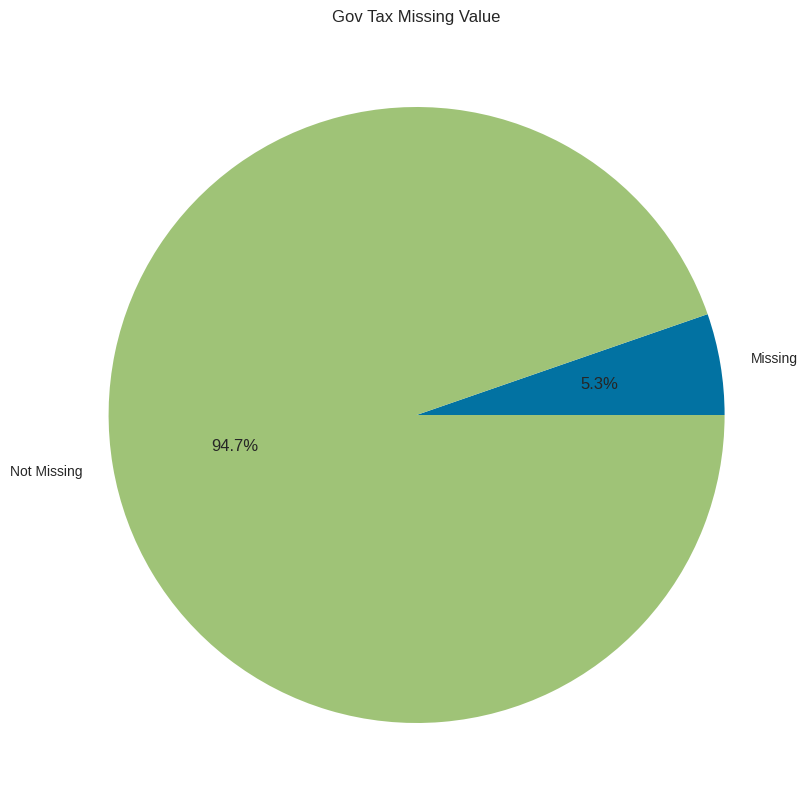

In [9]:
jumlah_missing = df['Gov_Tax'].isna().sum()

plt.figure(figsize=(15, 10))
plt.title("Gov Tax Missing Value")
plt.pie([jumlah_missing, df.shape[0] - jumlah_missing],
        labels=['Missing', 'Not Missing'],
        autopct="%1.1f%%")
plt.show()

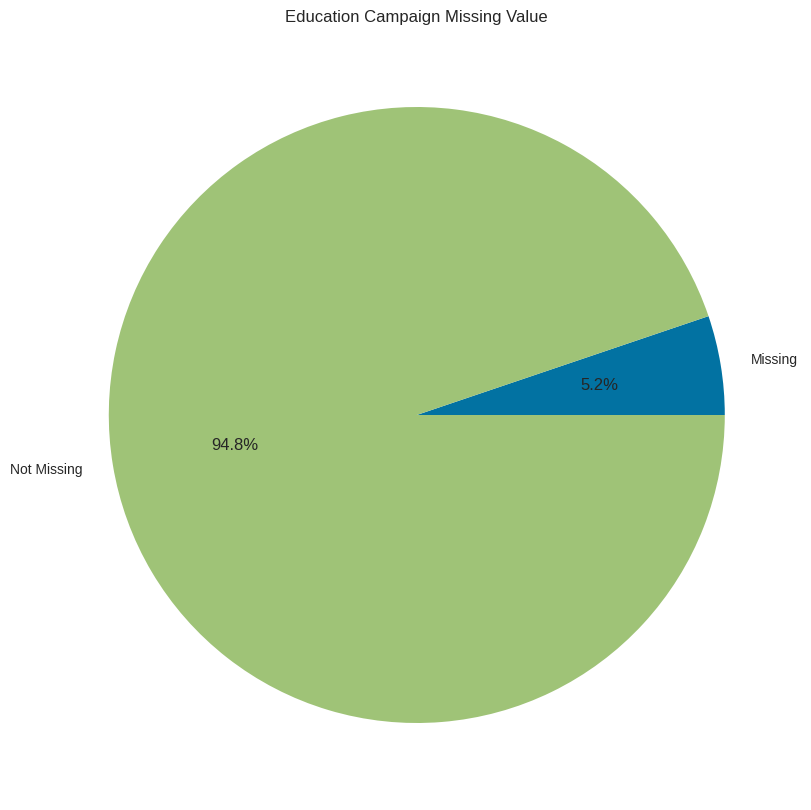

In [10]:
jumlah_missing = df['Education_Campaign'].isna().sum()

plt.figure(figsize=(15, 10))
plt.title("Education Campaign Missing Value")
plt.pie([jumlah_missing, df.shape[0] - jumlah_missing],
        labels=['Missing', 'Not Missing'],
        autopct="%1.1f%%")
plt.show()

## **Analisis Distribusi dan Korelasi**

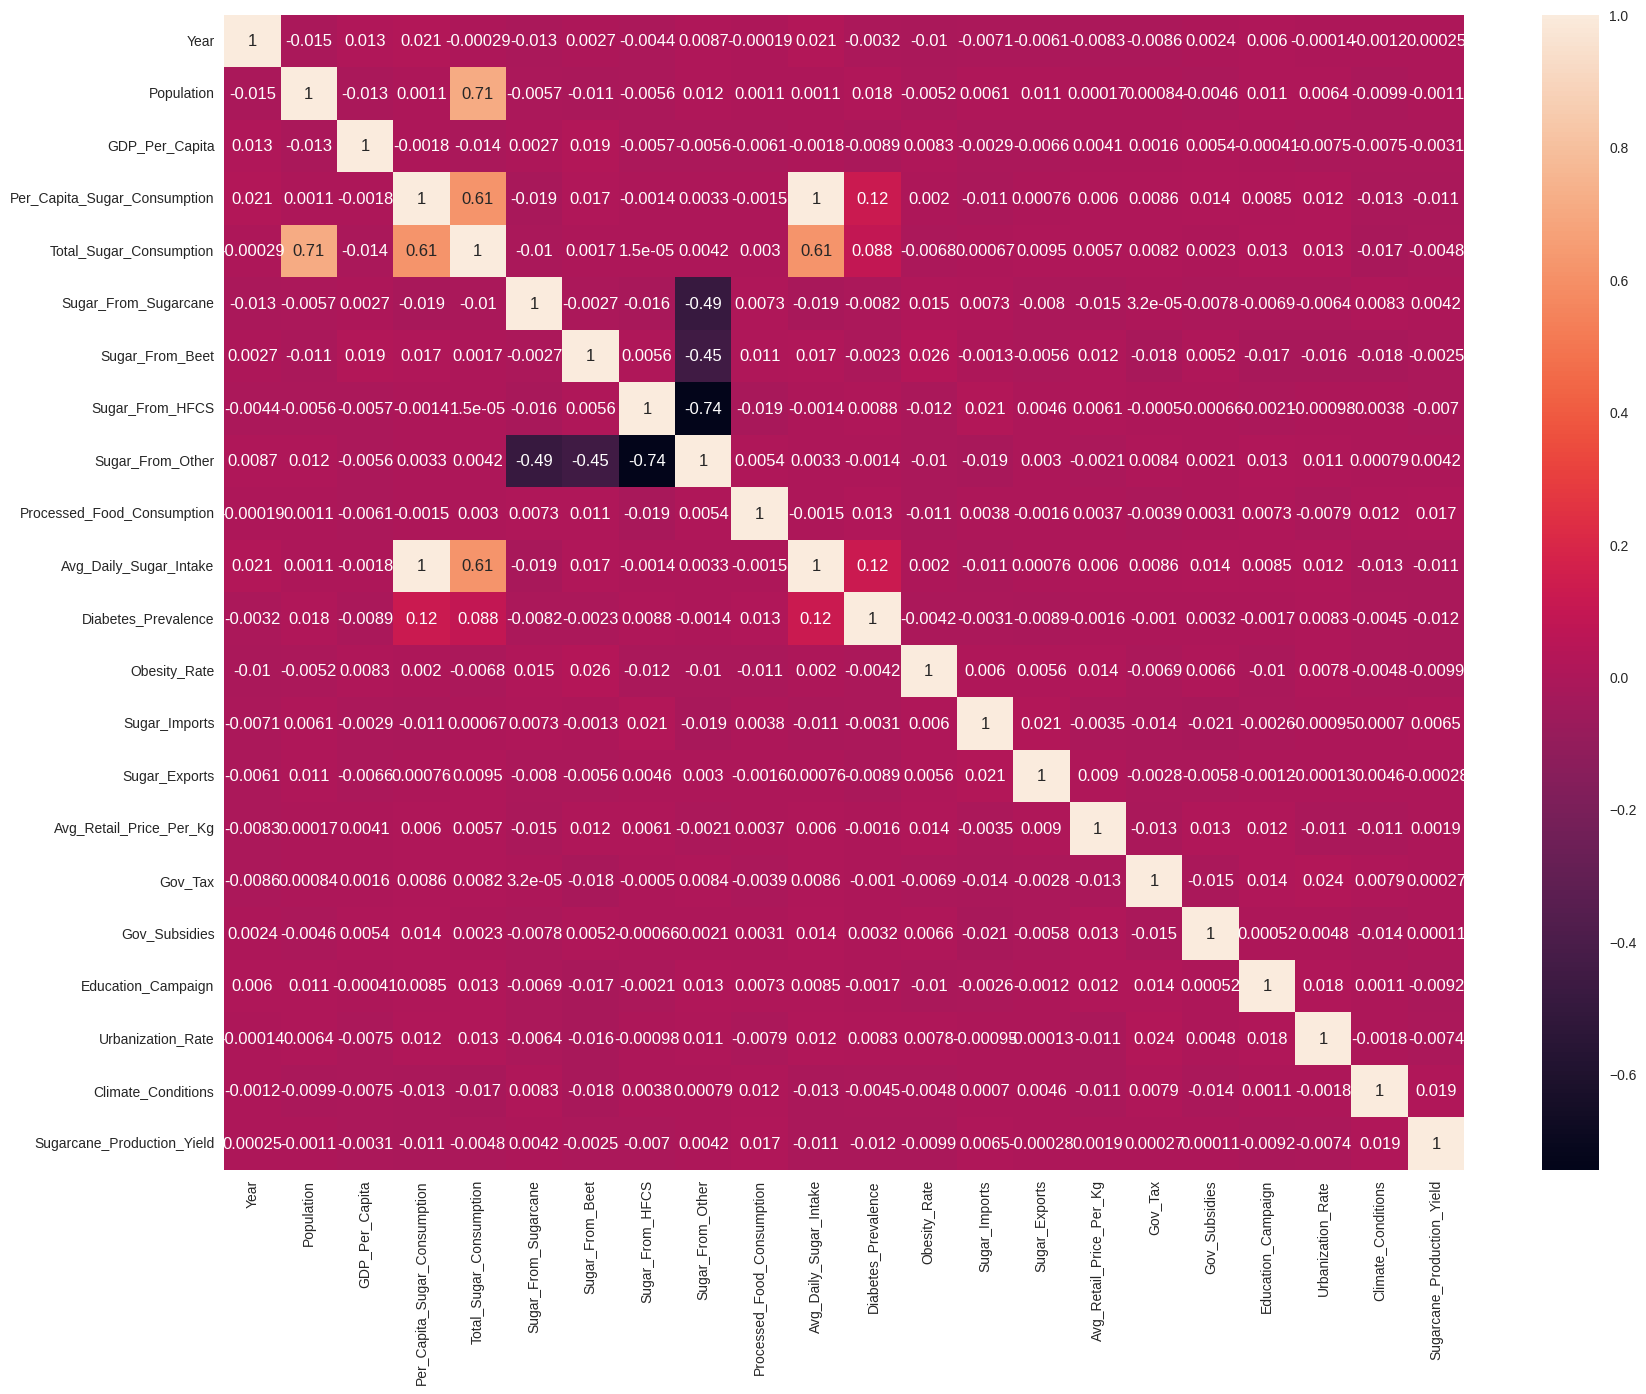

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True)
plt.show()

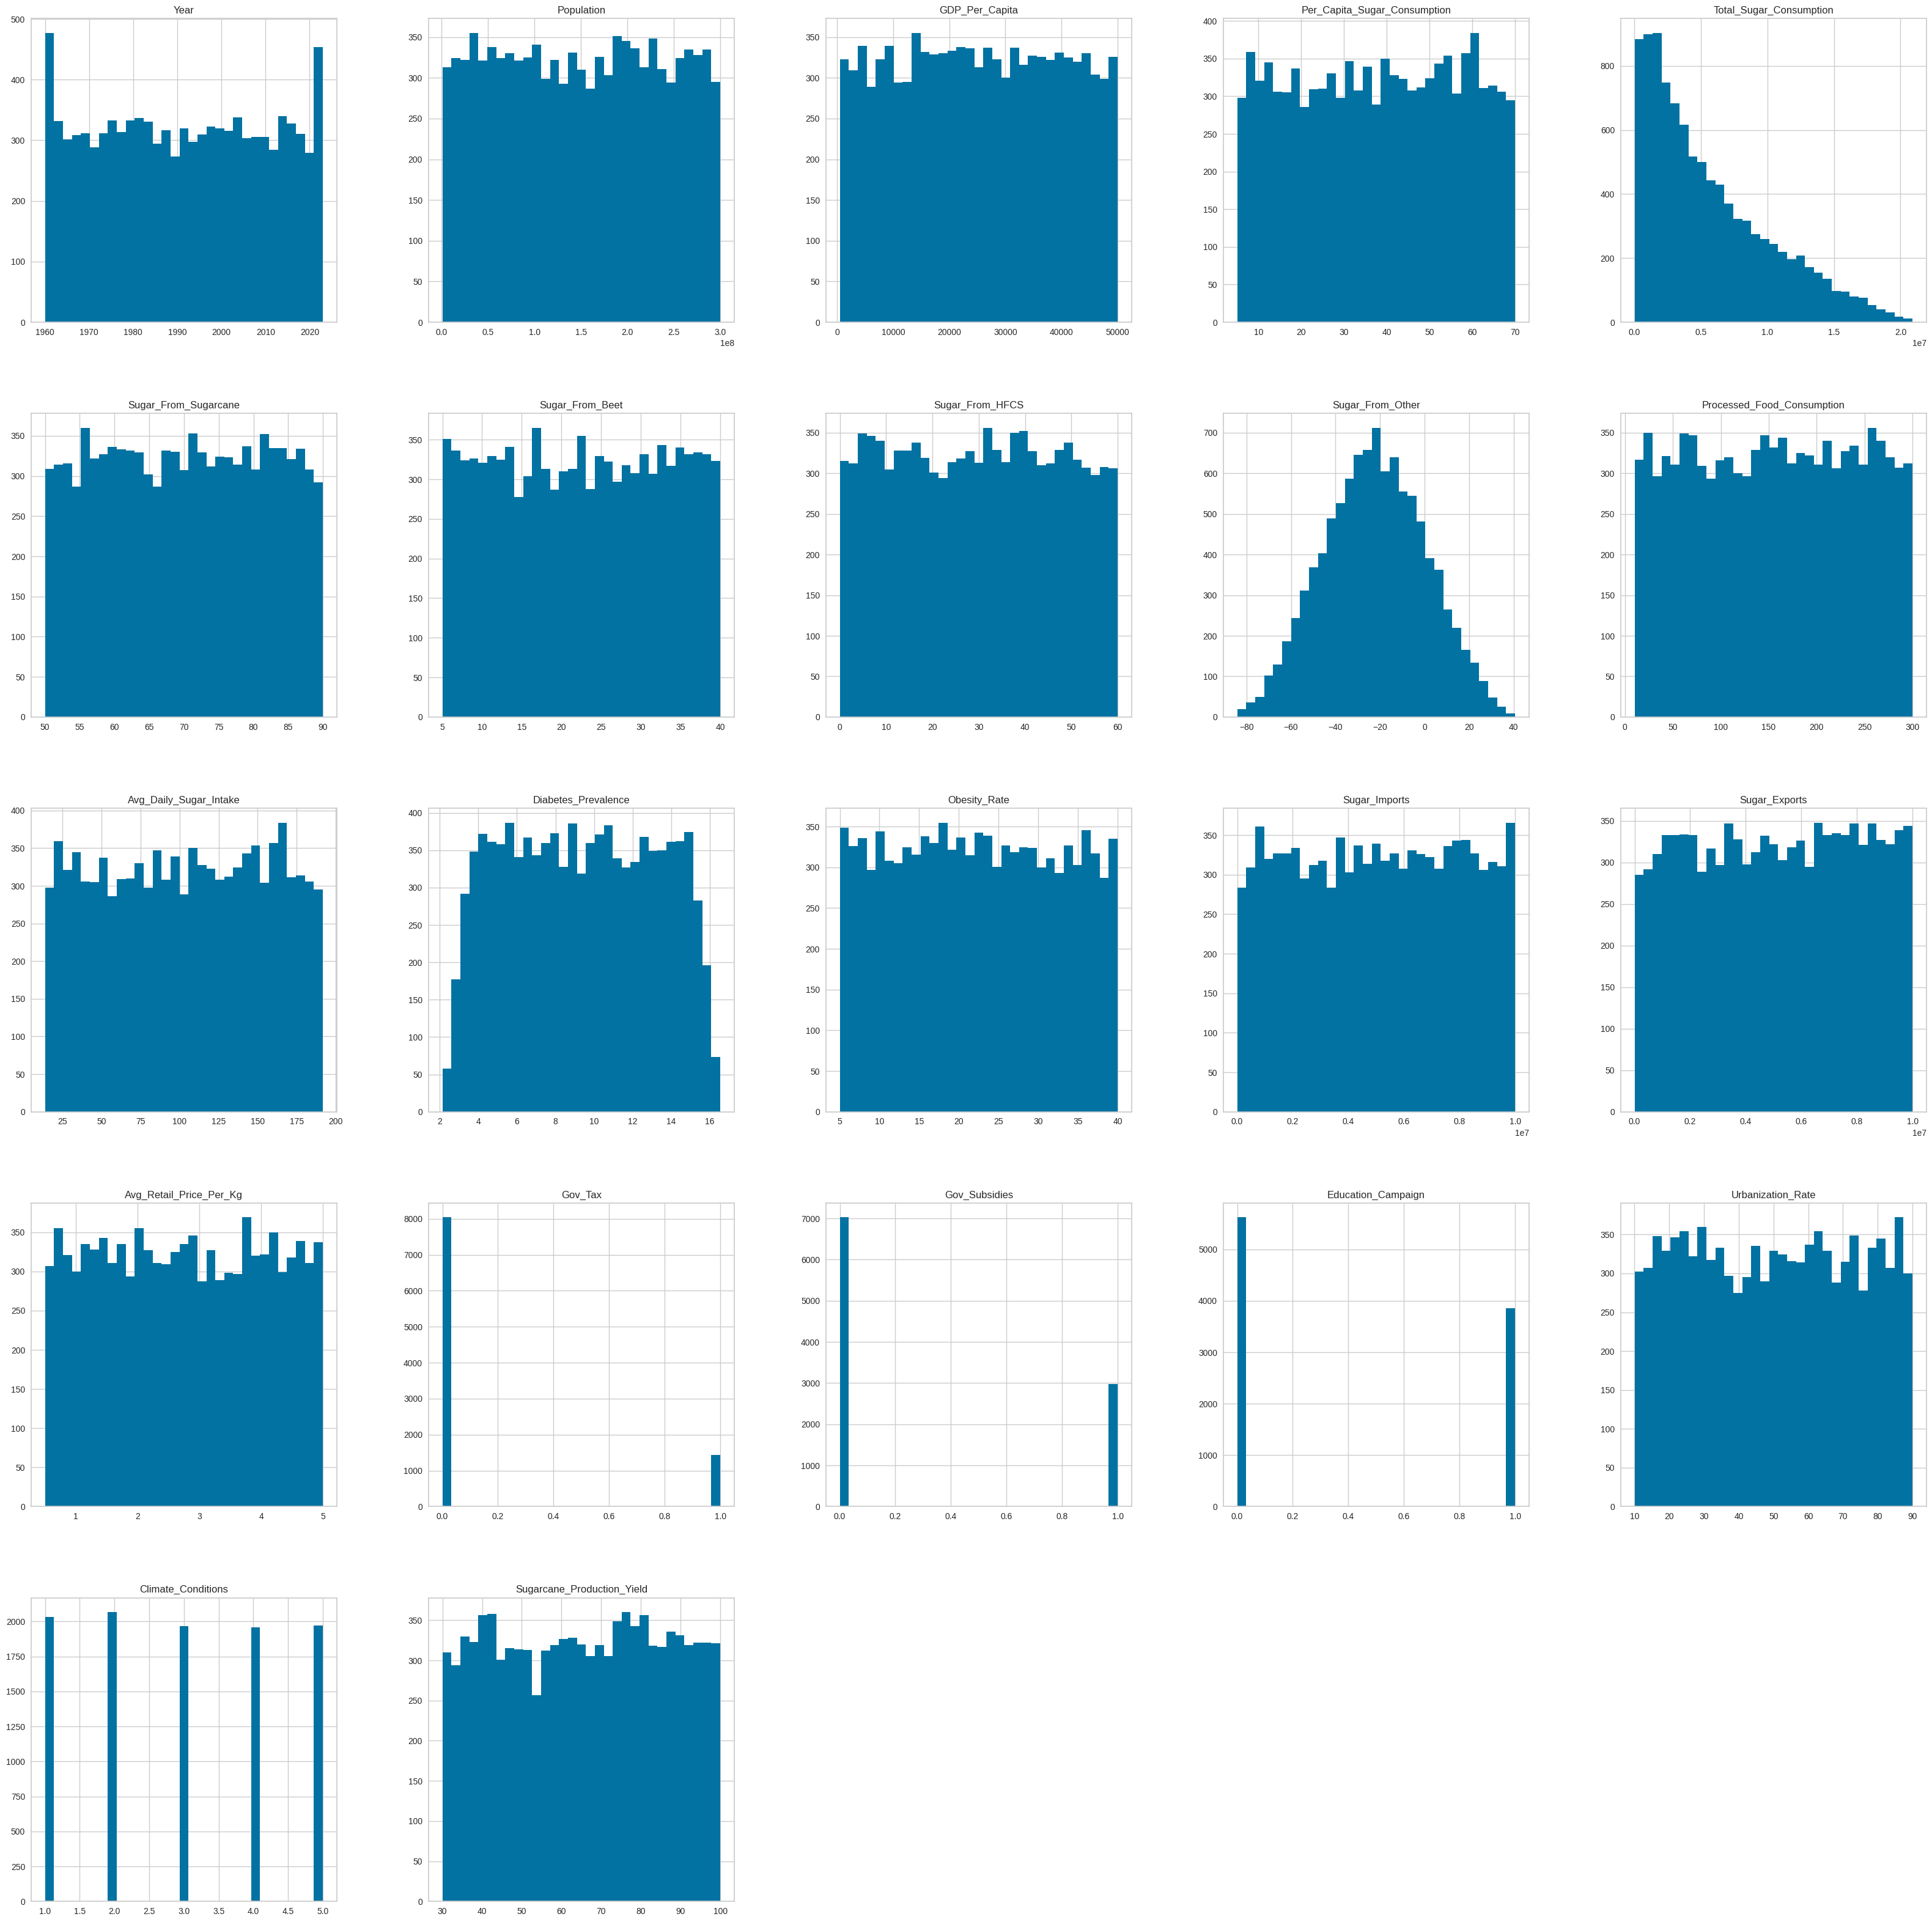

In [12]:
bins = int(1 + 3.3 * np.log(df.shape[0]))
df.hist(figsize=(40, 40), bins=bins)
plt.show()

## **Visualisasi Data**

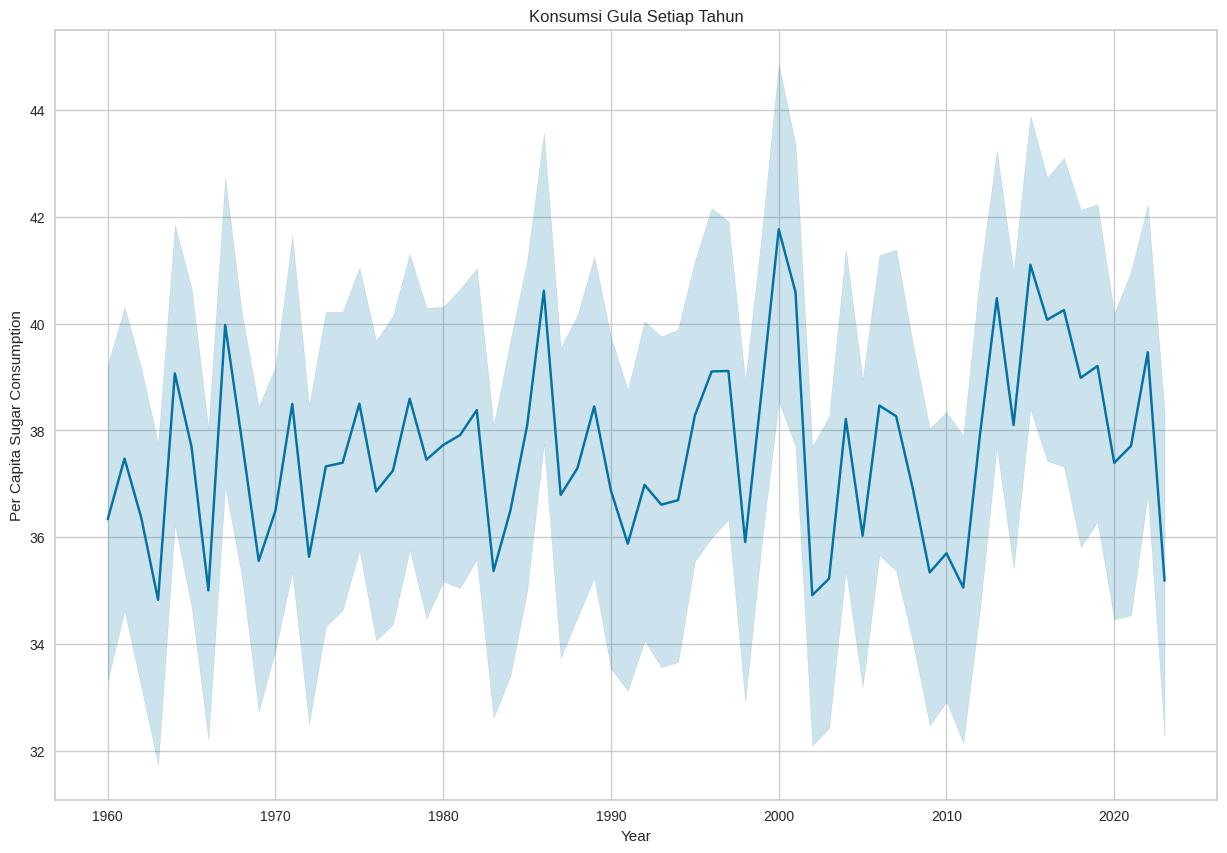

In [13]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df, x="Year", y="Per_Capita_Sugar_Consumption", estimator='mean')
plt.title('Konsumsi Gula Setiap Tahun')
plt.xlabel('Year')
plt.ylabel('Per Capita Sugar Consumption')
plt.show()

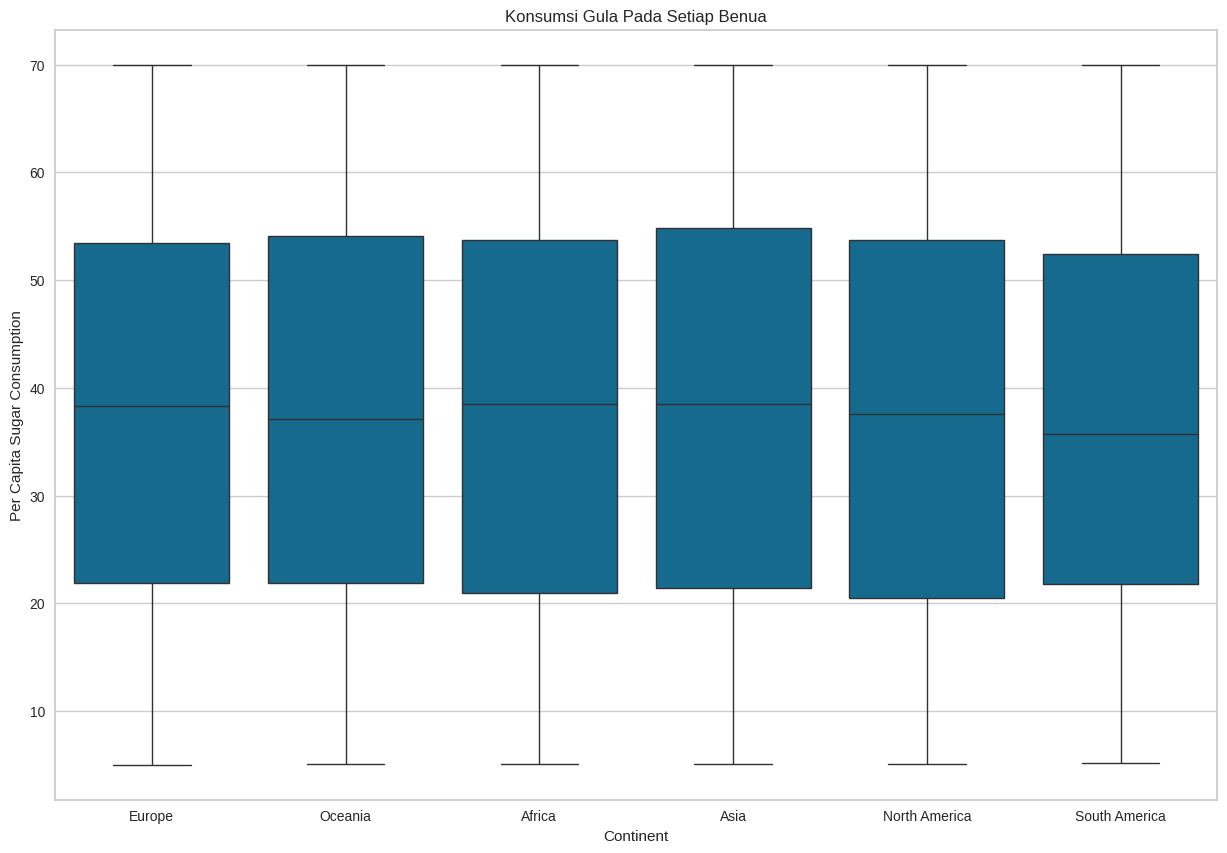

In [14]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="Continent", y="Per_Capita_Sugar_Consumption")
plt.title('Konsumsi Gula Pada Setiap Benua')
plt.xlabel('Continent')
plt.ylabel('Per Capita Sugar Consumption')
plt.show()

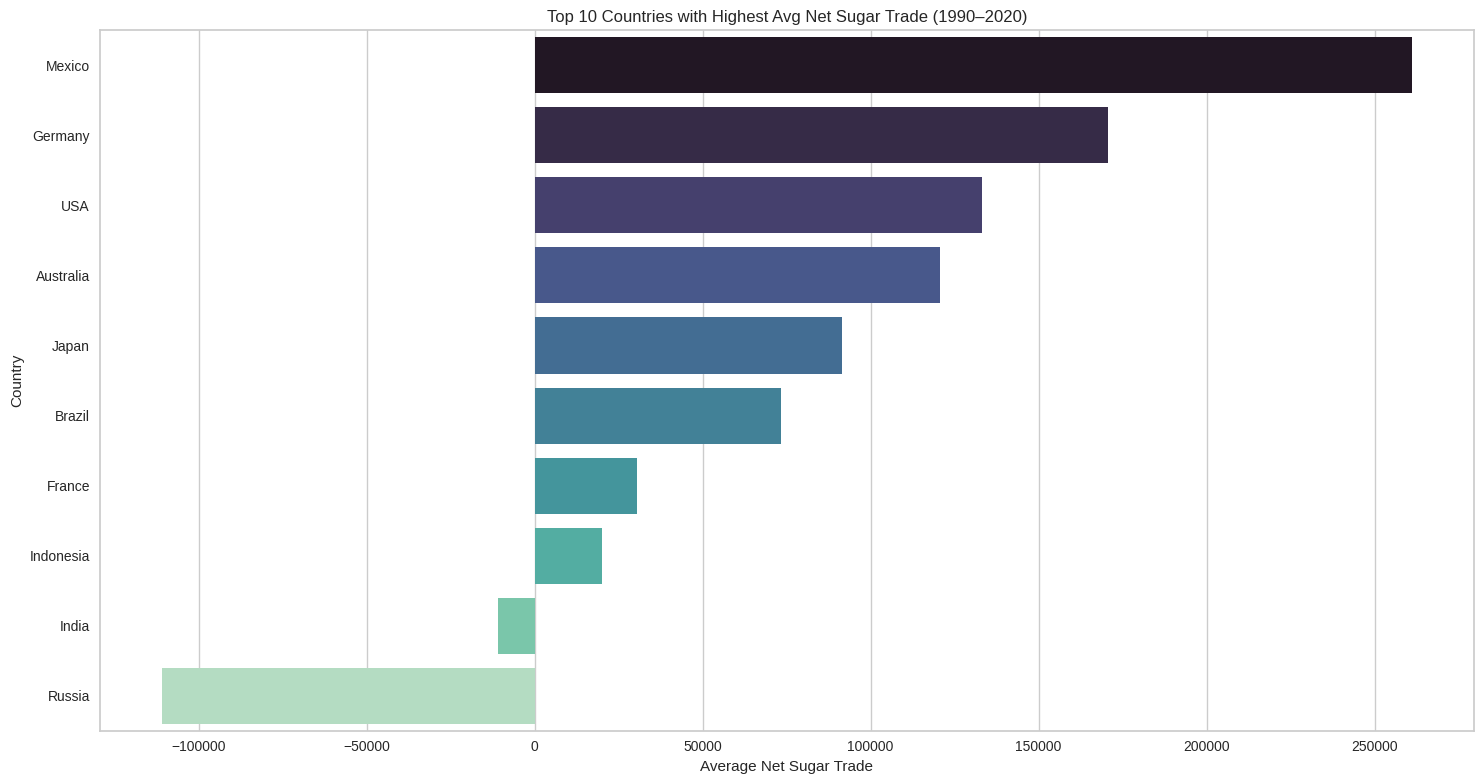

In [15]:
df["Net_Sugar_Trade"] = df["Sugar_Exports"] - df["Sugar_Imports"]

avg_trade = df.groupby("Country")["Net_Sugar_Trade"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x=avg_trade.values, y=avg_trade.index, palette="mako")
plt.title("Top 10 Countries with Highest Avg Net Sugar Trade (1990–2020)")
plt.xlabel("Average Net Sugar Trade")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## **Menghapus Data Duplikat**

In [16]:
data_preprocessing = df.copy(deep=True)
data_preprocessing.drop_duplicates(inplace=True)

## **Encoding Data Kategorikal**

In [17]:
object_columns = data_preprocessing.select_dtypes(include='object').columns

for i in object_columns:
    print(data_preprocessing[i].value_counts())
    print('='*50)

Country
Australia       917
Indonesia       877
France          861
Japan           846
Germany         832
India           829
Mexico          820
Russia          817
South Africa    816
USA             800
China           797
Brazil          788
Name: count, dtype: int64
Country_Code
AUS    917
IDN    877
FRA    861
JPN    846
DEU    832
IND    829
MEX    820
RUS    817
ZAF    816
USA    800
CHN    797
BRA    788
Name: count, dtype: int64
Continent
Asia             3349
Europe           2510
North America    1620
Oceania           917
Africa            816
South America     788
Name: count, dtype: int64
Region
Western Europe             1693
East Asia                  1643
Australia & New Zealand     917
Southeast Asia              877
South Asia                  829
Central America             820
Eastern Europe              817
Sub-Saharan Africa          816
Northern America            800
South America               788
Name: count, dtype: int64


> Fitur yang akan diencoding hanya Continent karena sudah mewakili fitur object yang lain. Sisanya akan didrop

In [18]:
one_hot_continent = pd.get_dummies(data_preprocessing['Continent'], prefix='Continent')
data_preprocessing = pd.concat([data_preprocessing, one_hot_continent], axis=1)
data_preprocessing.drop(['Continent', 'Region', 'Country_Code', 'Country'], axis=1, inplace=True)

In [19]:
bool_columns = data_preprocessing.select_dtypes(include='bool').columns

data_preprocessing[bool_columns] = data_preprocessing[bool_columns].astype(int)

## **Menangani Data Kosong (Missing Values)**

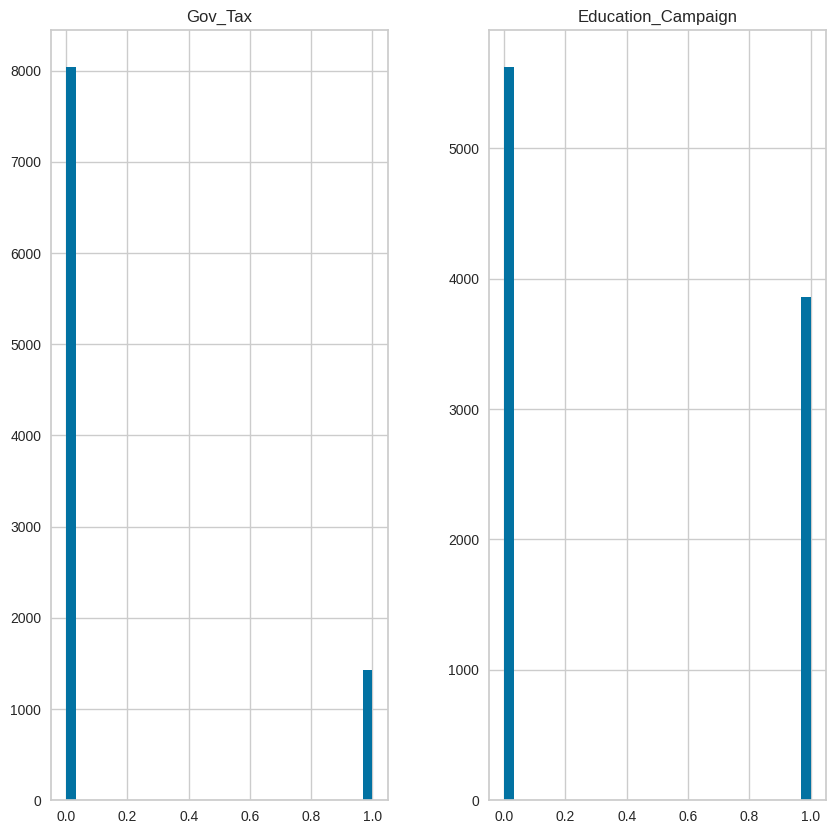

In [20]:
selected_feature = ['Gov_Tax', 'Education_Campaign']

bins = int(1 + 3.3 * np.log(df.shape[0]))
df[selected_feature].hist(figsize=(10, 10), bins=bins)
plt.show()

In [21]:
for col in selected_feature:
    data_preprocessing[col] = data_preprocessing[col].fillna(df[col].mode().iloc[0])

## **Deteksi dan Penanganan Outlier**

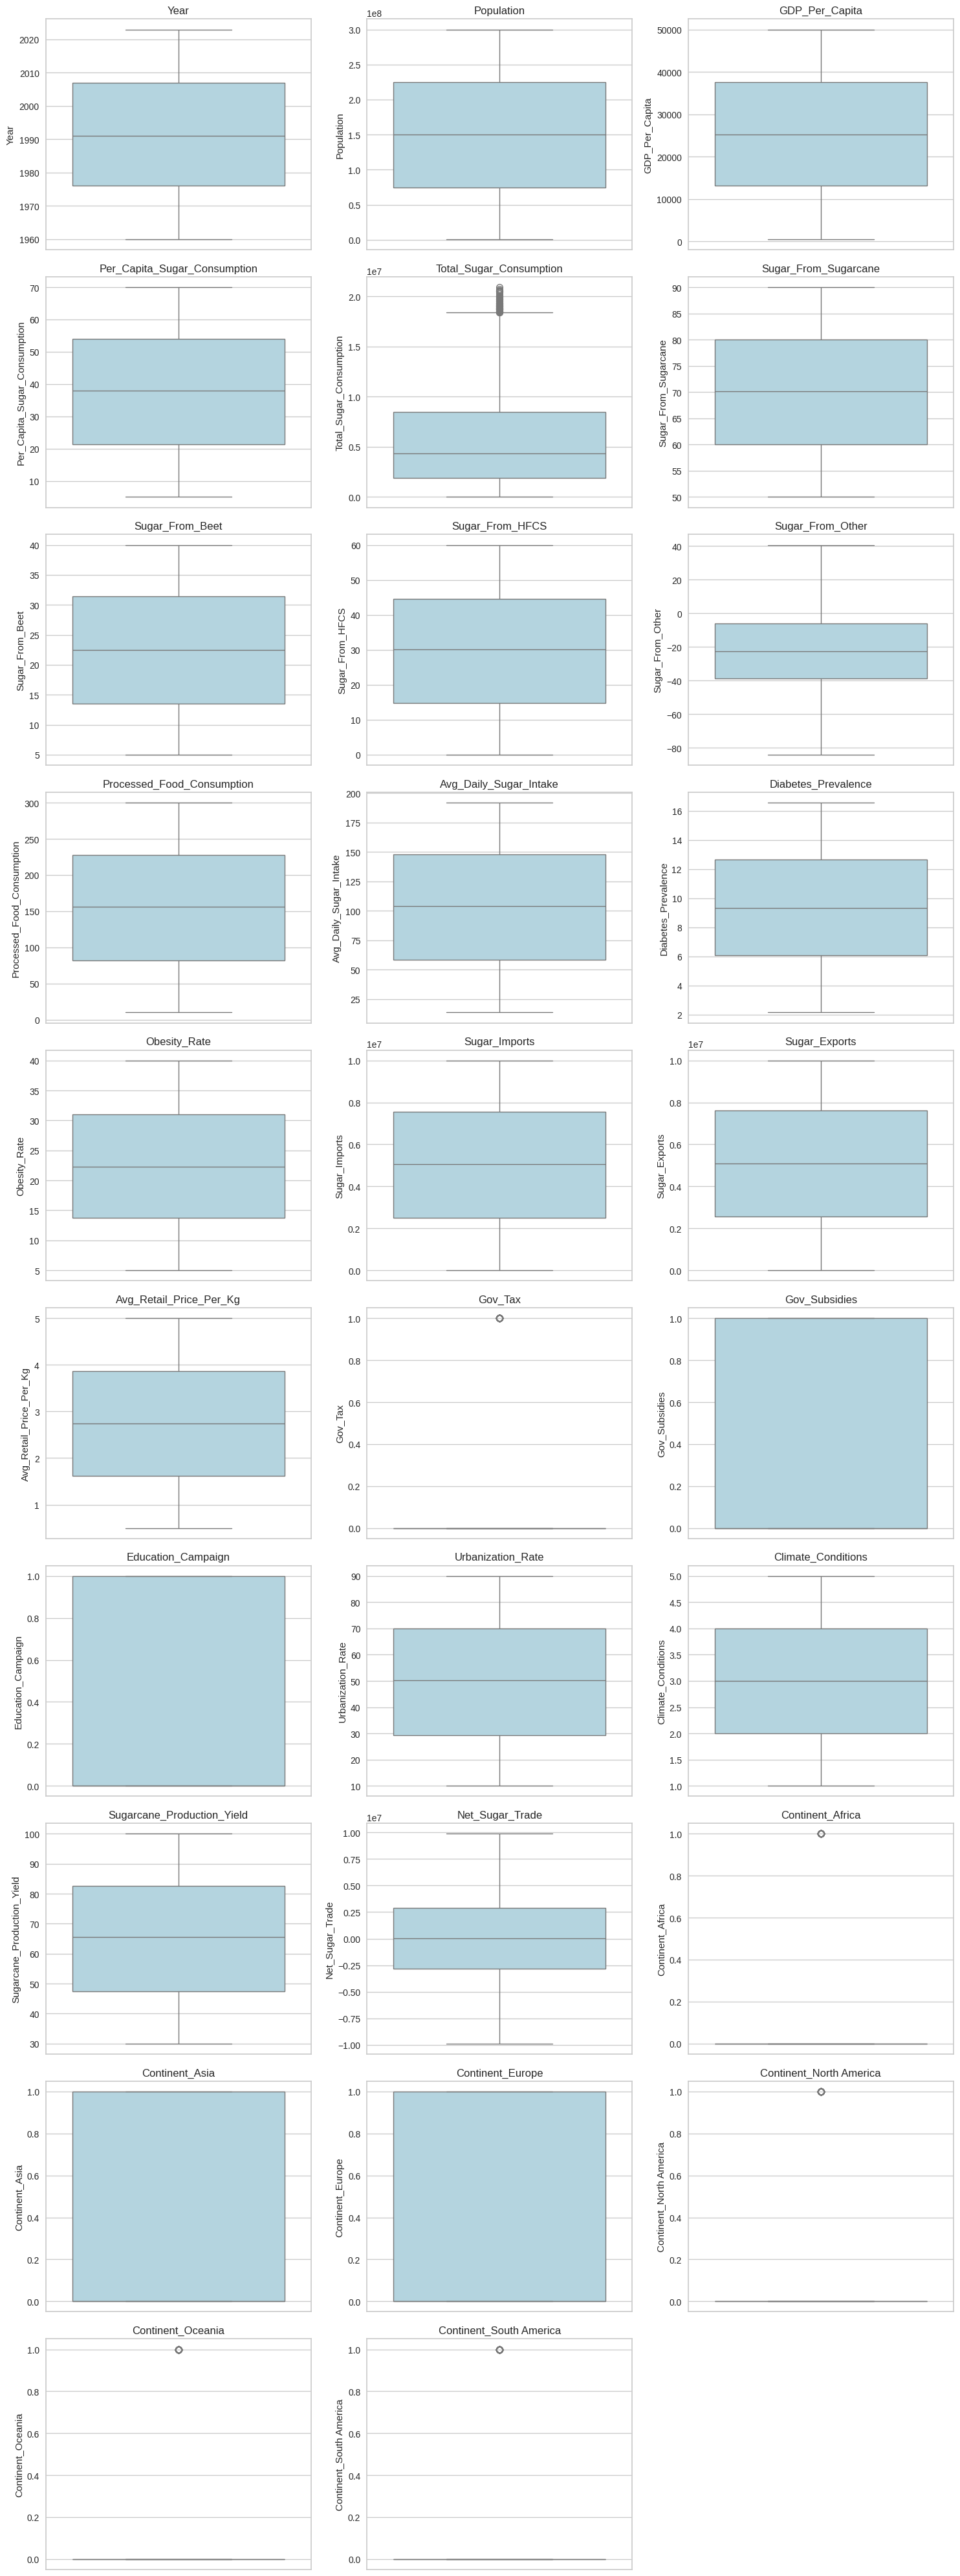

In [22]:
data_columns = data_preprocessing.columns
n_cols = 3
n_rows = (len(data_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(data_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=data_preprocessing[col], color='lightblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

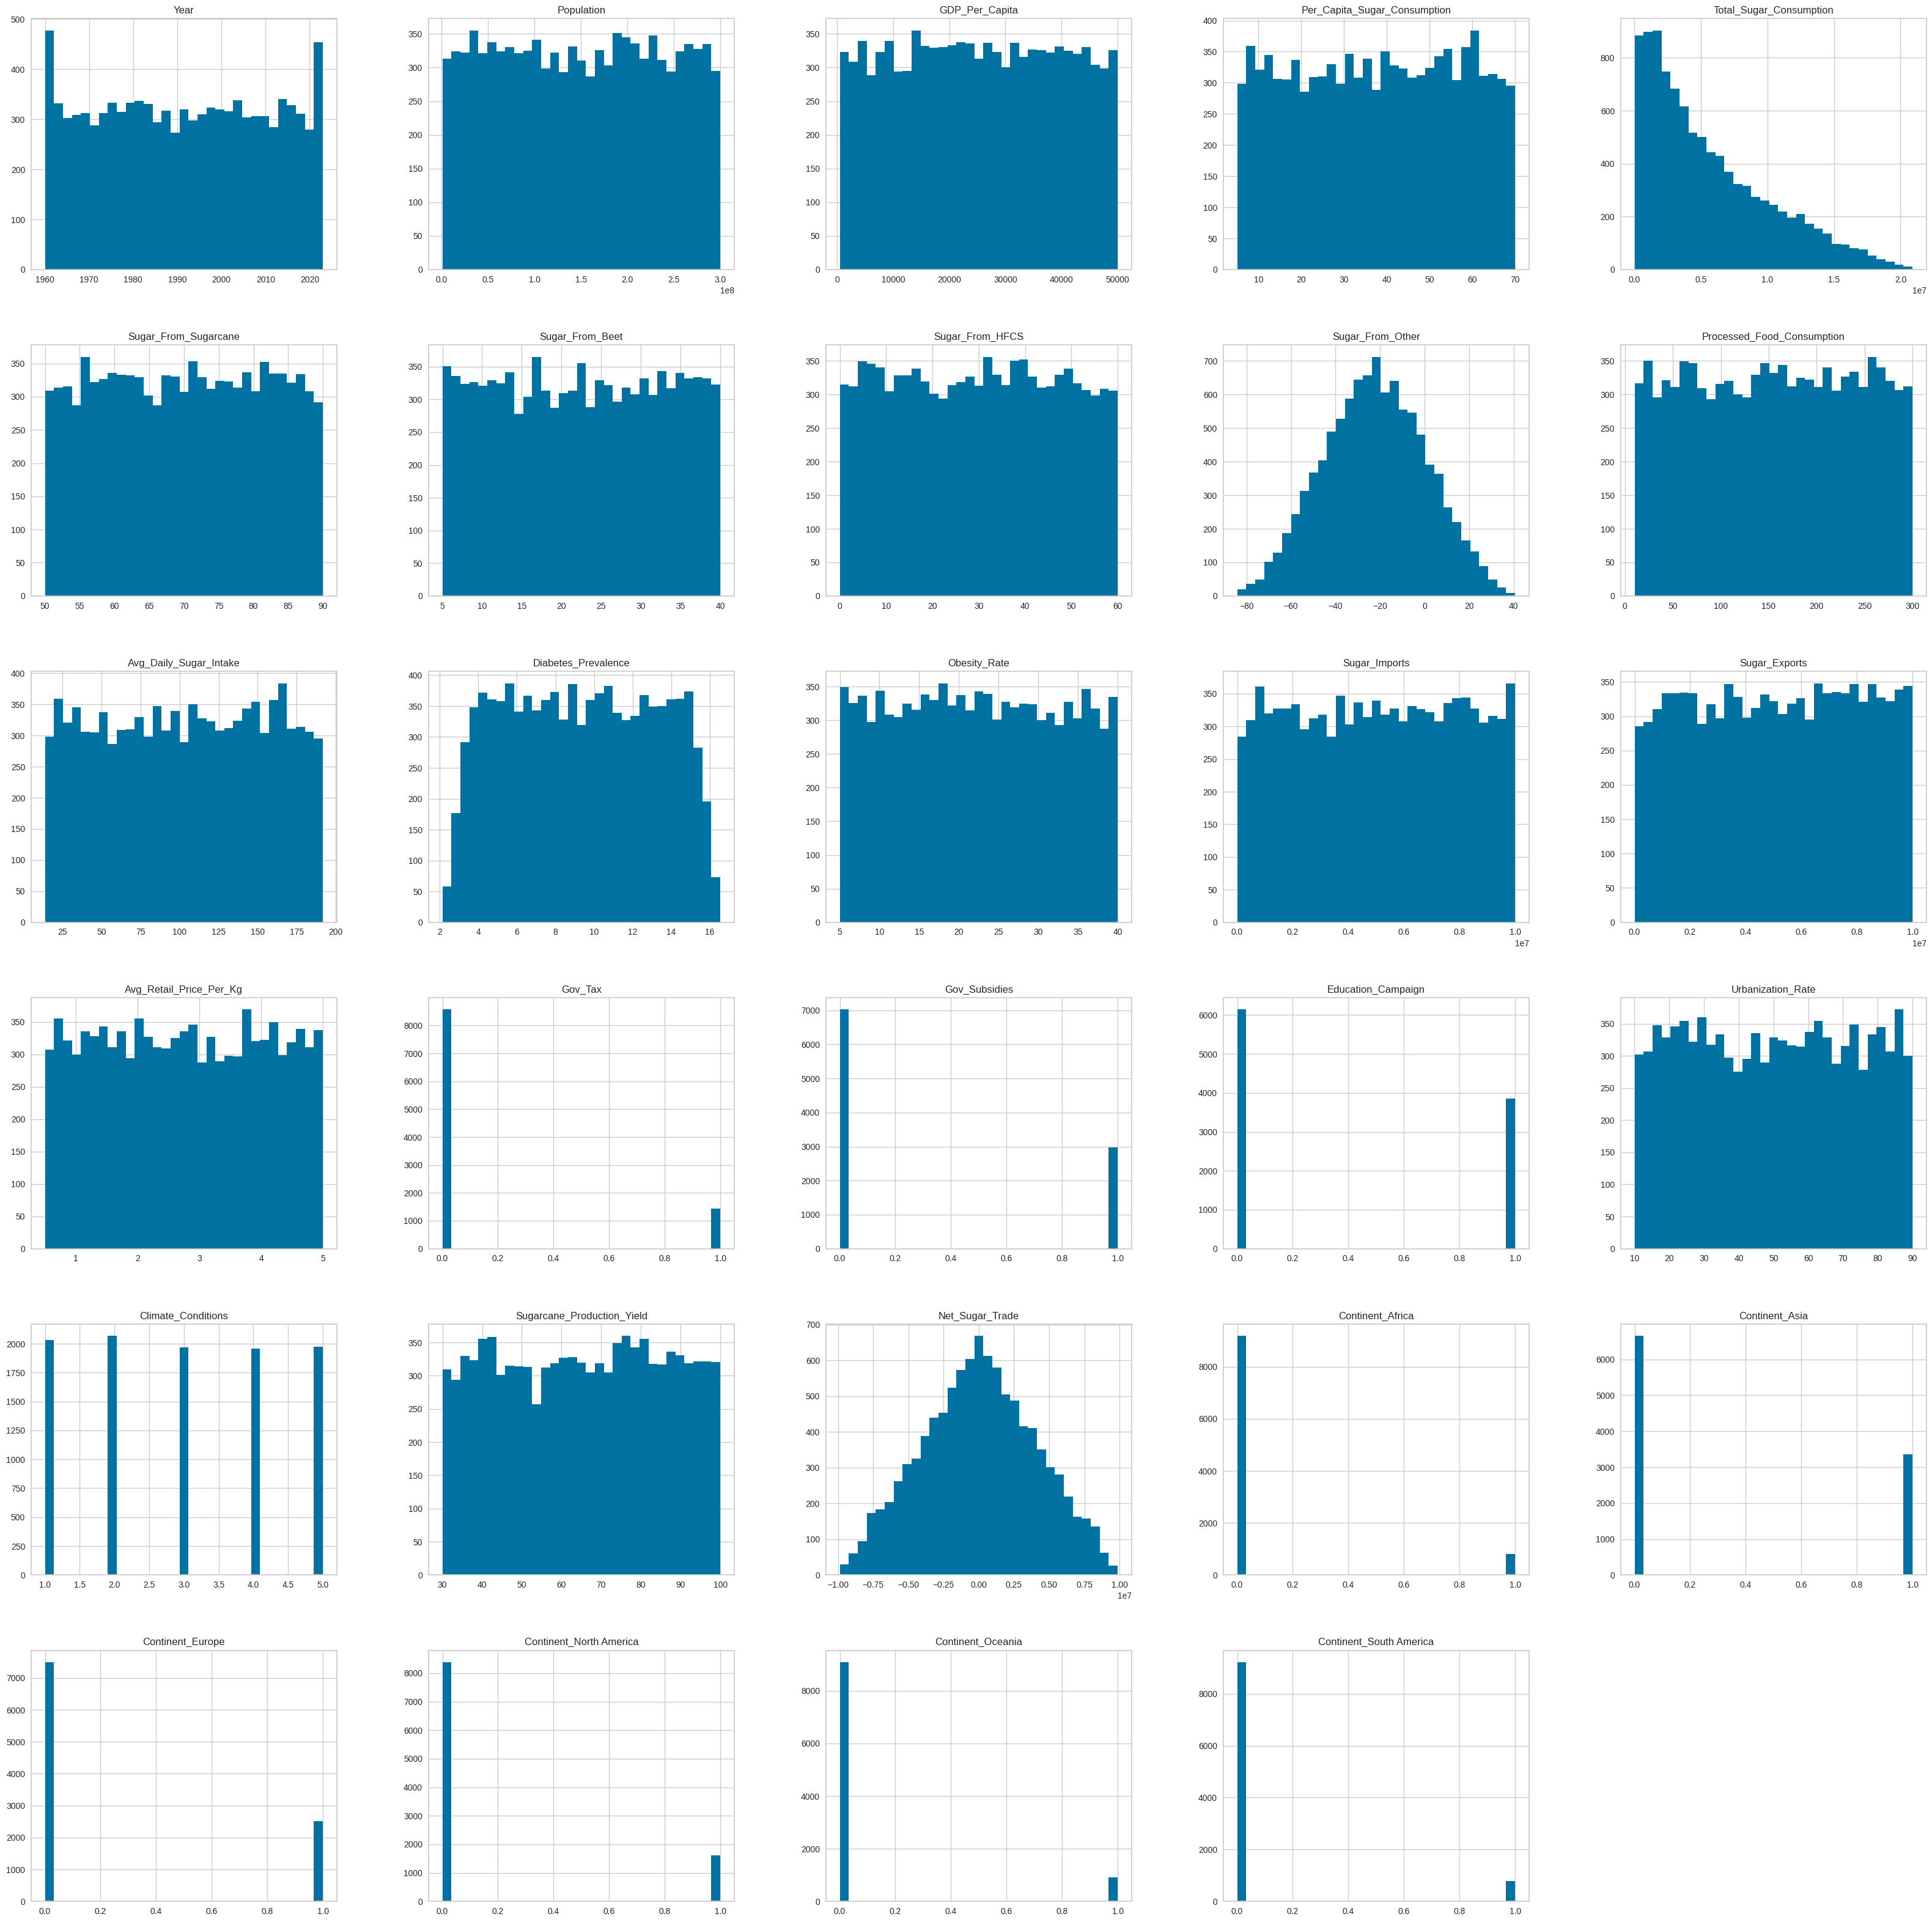

In [23]:
bins = int(1 + 3.3 * np.log(data_preprocessing.shape[0]))
data_preprocessing.hist(figsize=(40, 40), bins=bins)
plt.show()

In [24]:
con_columns = ['Population', 'GDP_Per_Capita', 'Per_Capita_Sugar_Consumption',
       'Total_Sugar_Consumption', 'Sugar_From_Sugarcane', 'Sugar_From_Beet',
       'Sugar_From_HFCS', 'Sugar_From_Other', 'Processed_Food_Consumption',
       'Avg_Daily_Sugar_Intake', 'Diabetes_Prevalence', 'Obesity_Rate',
       'Sugar_Imports', 'Sugar_Exports', 'Avg_Retail_Price_Per_Kg', 'Urbanization_Rate',
        'Sugarcane_Production_Yield', 'Net_Sugar_Trade']

In [25]:
def calculate_iqr_bounds(data):

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    q05 = np.percentile(data, 5)
    q95 = np.percentile(data, 95)

    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return lower_bound, upper_bound, q05, q95

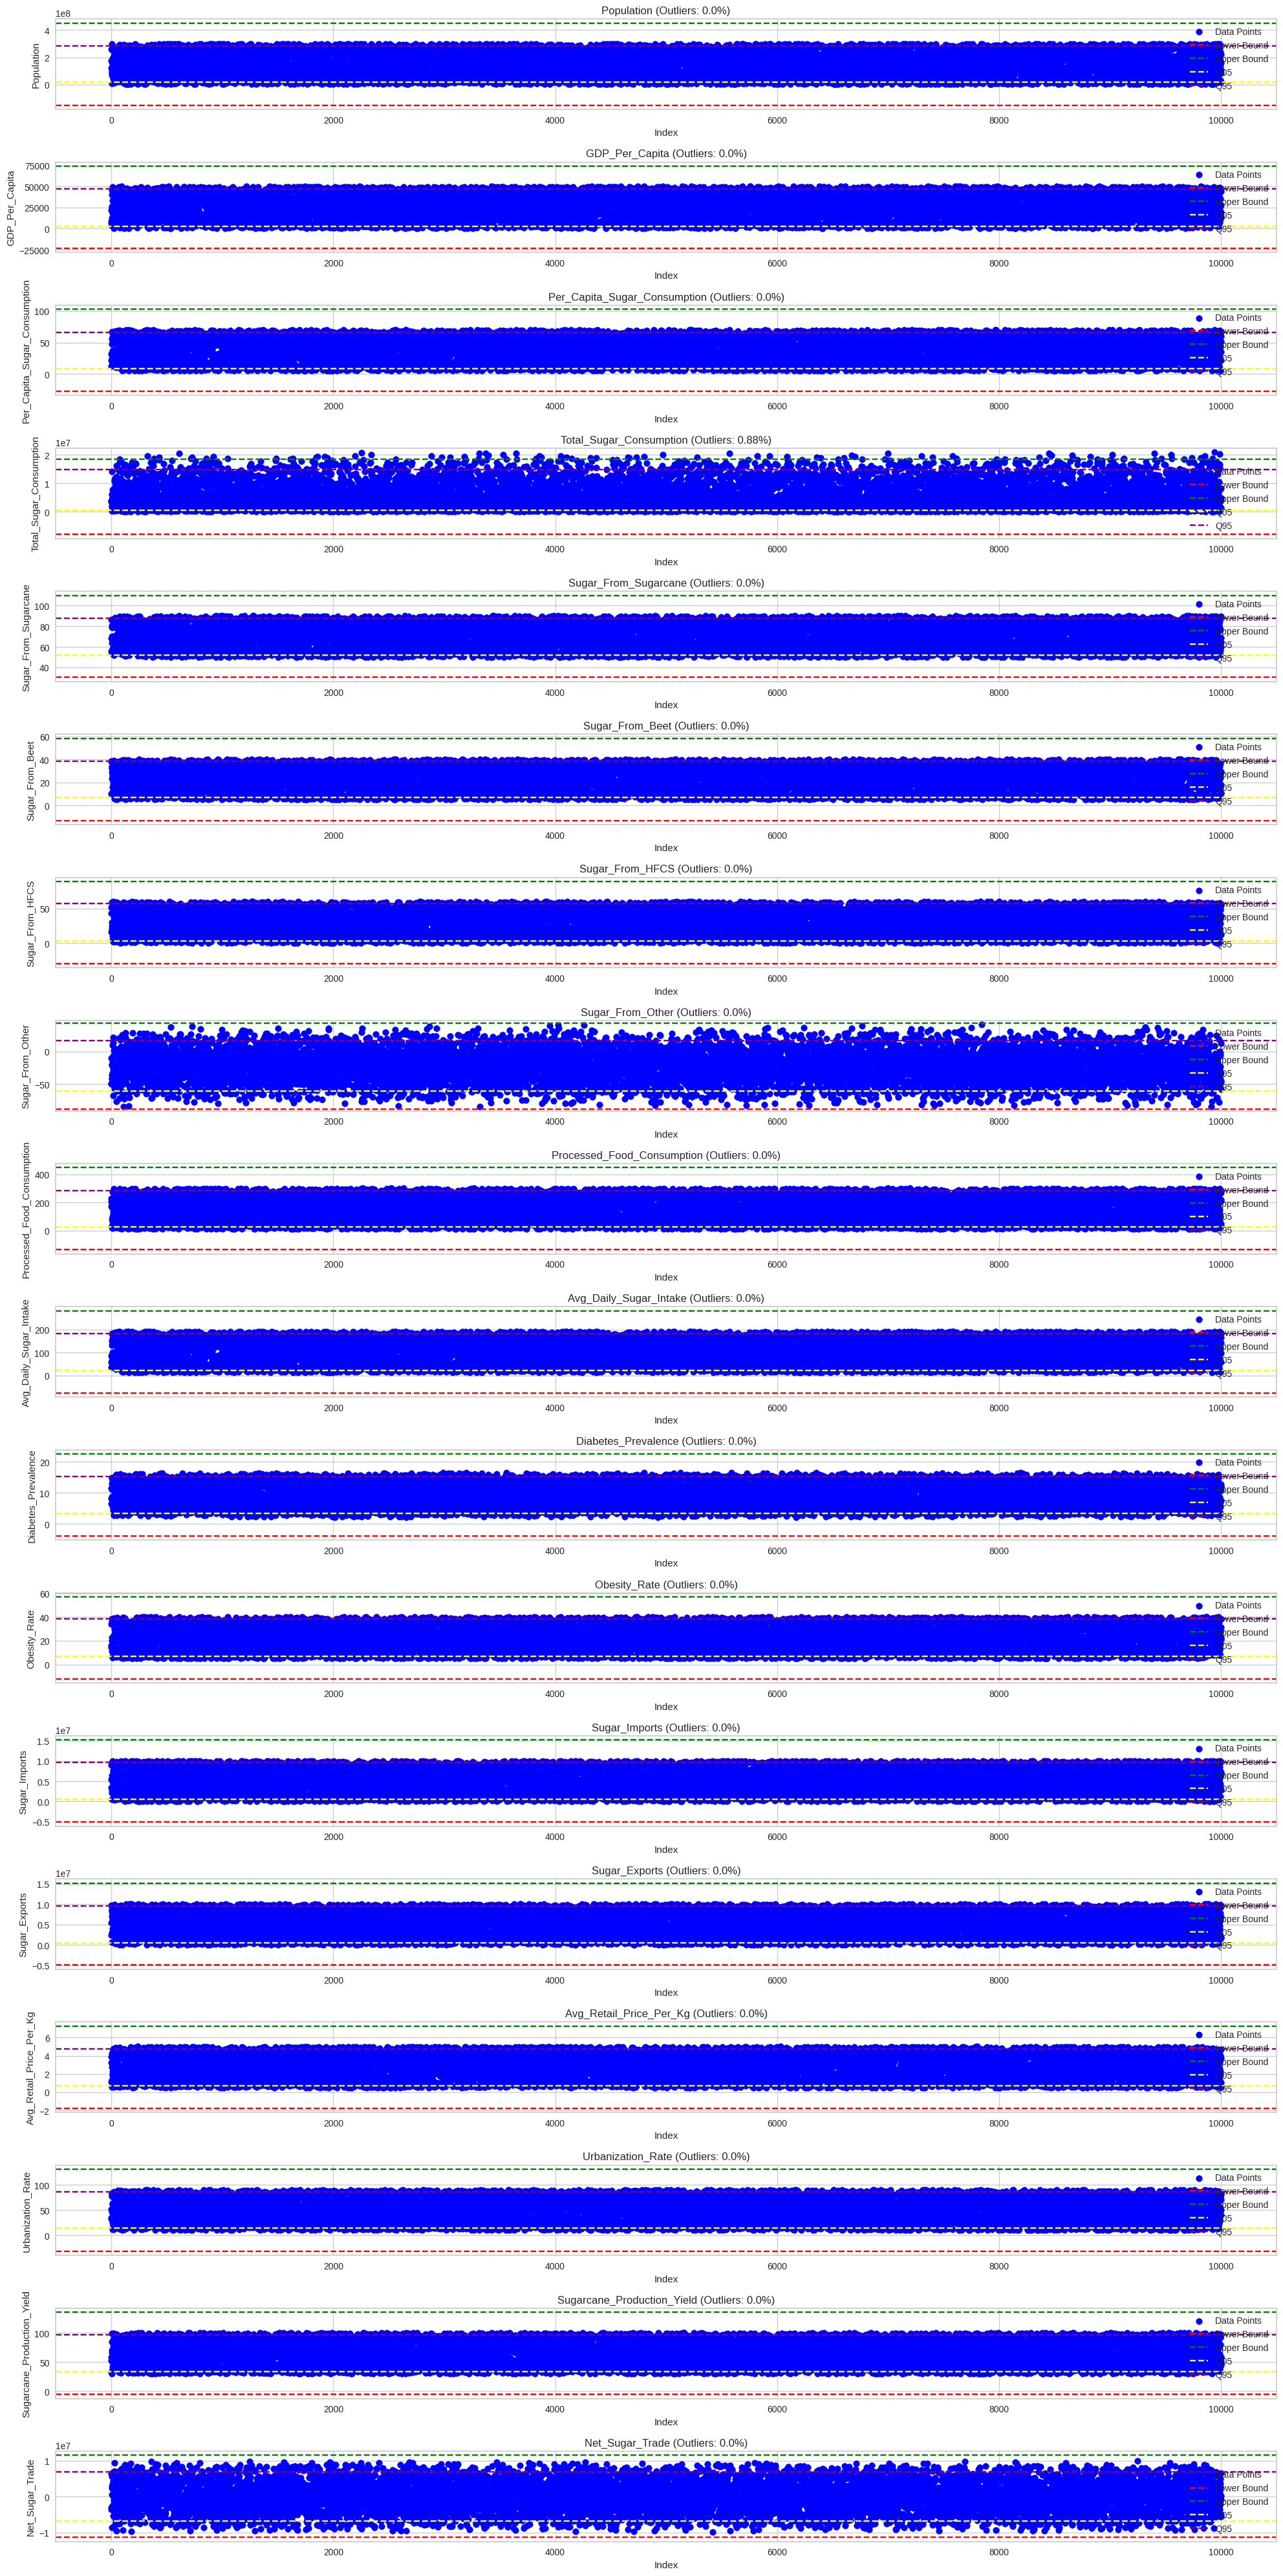

In [26]:
fig, ax = plt.subplots(len(con_columns), 1, figsize=(20, 40))

for i, column in enumerate(con_columns):
    lower_bound, upper_bound, q05, q95 = calculate_iqr_bounds(data_preprocessing[column])

    outlier_mask = (data_preprocessing[column] < lower_bound) | (data_preprocessing[column] > upper_bound)
    n_outliers = outlier_mask.sum()
    total = len(data_preprocessing[column])
    percent_outliers = (n_outliers / total) * 100

    ax[i].scatter(data_preprocessing.index, data_preprocessing[column], color='blue', label='Data Points')

    ax[i].axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
    ax[i].axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')
    ax[i].axhline(y=q05, color='yellow', linestyle='--', label='Q05')
    ax[i].axhline(y=q95, color='purple', linestyle='--', label='Q95')

    ax[i].set_title(f"{column} (Outliers: {percent_outliers}%)")
    ax[i].set_xlabel('Index')
    ax[i].set_ylabel(column)

    ax[i].legend()

plt.tight_layout()
plt.show()

In [27]:
data_preprocessing[con_columns] = data_preprocessing[con_columns].apply(lambda x: winsorize(x, (0.05, 0.05)))

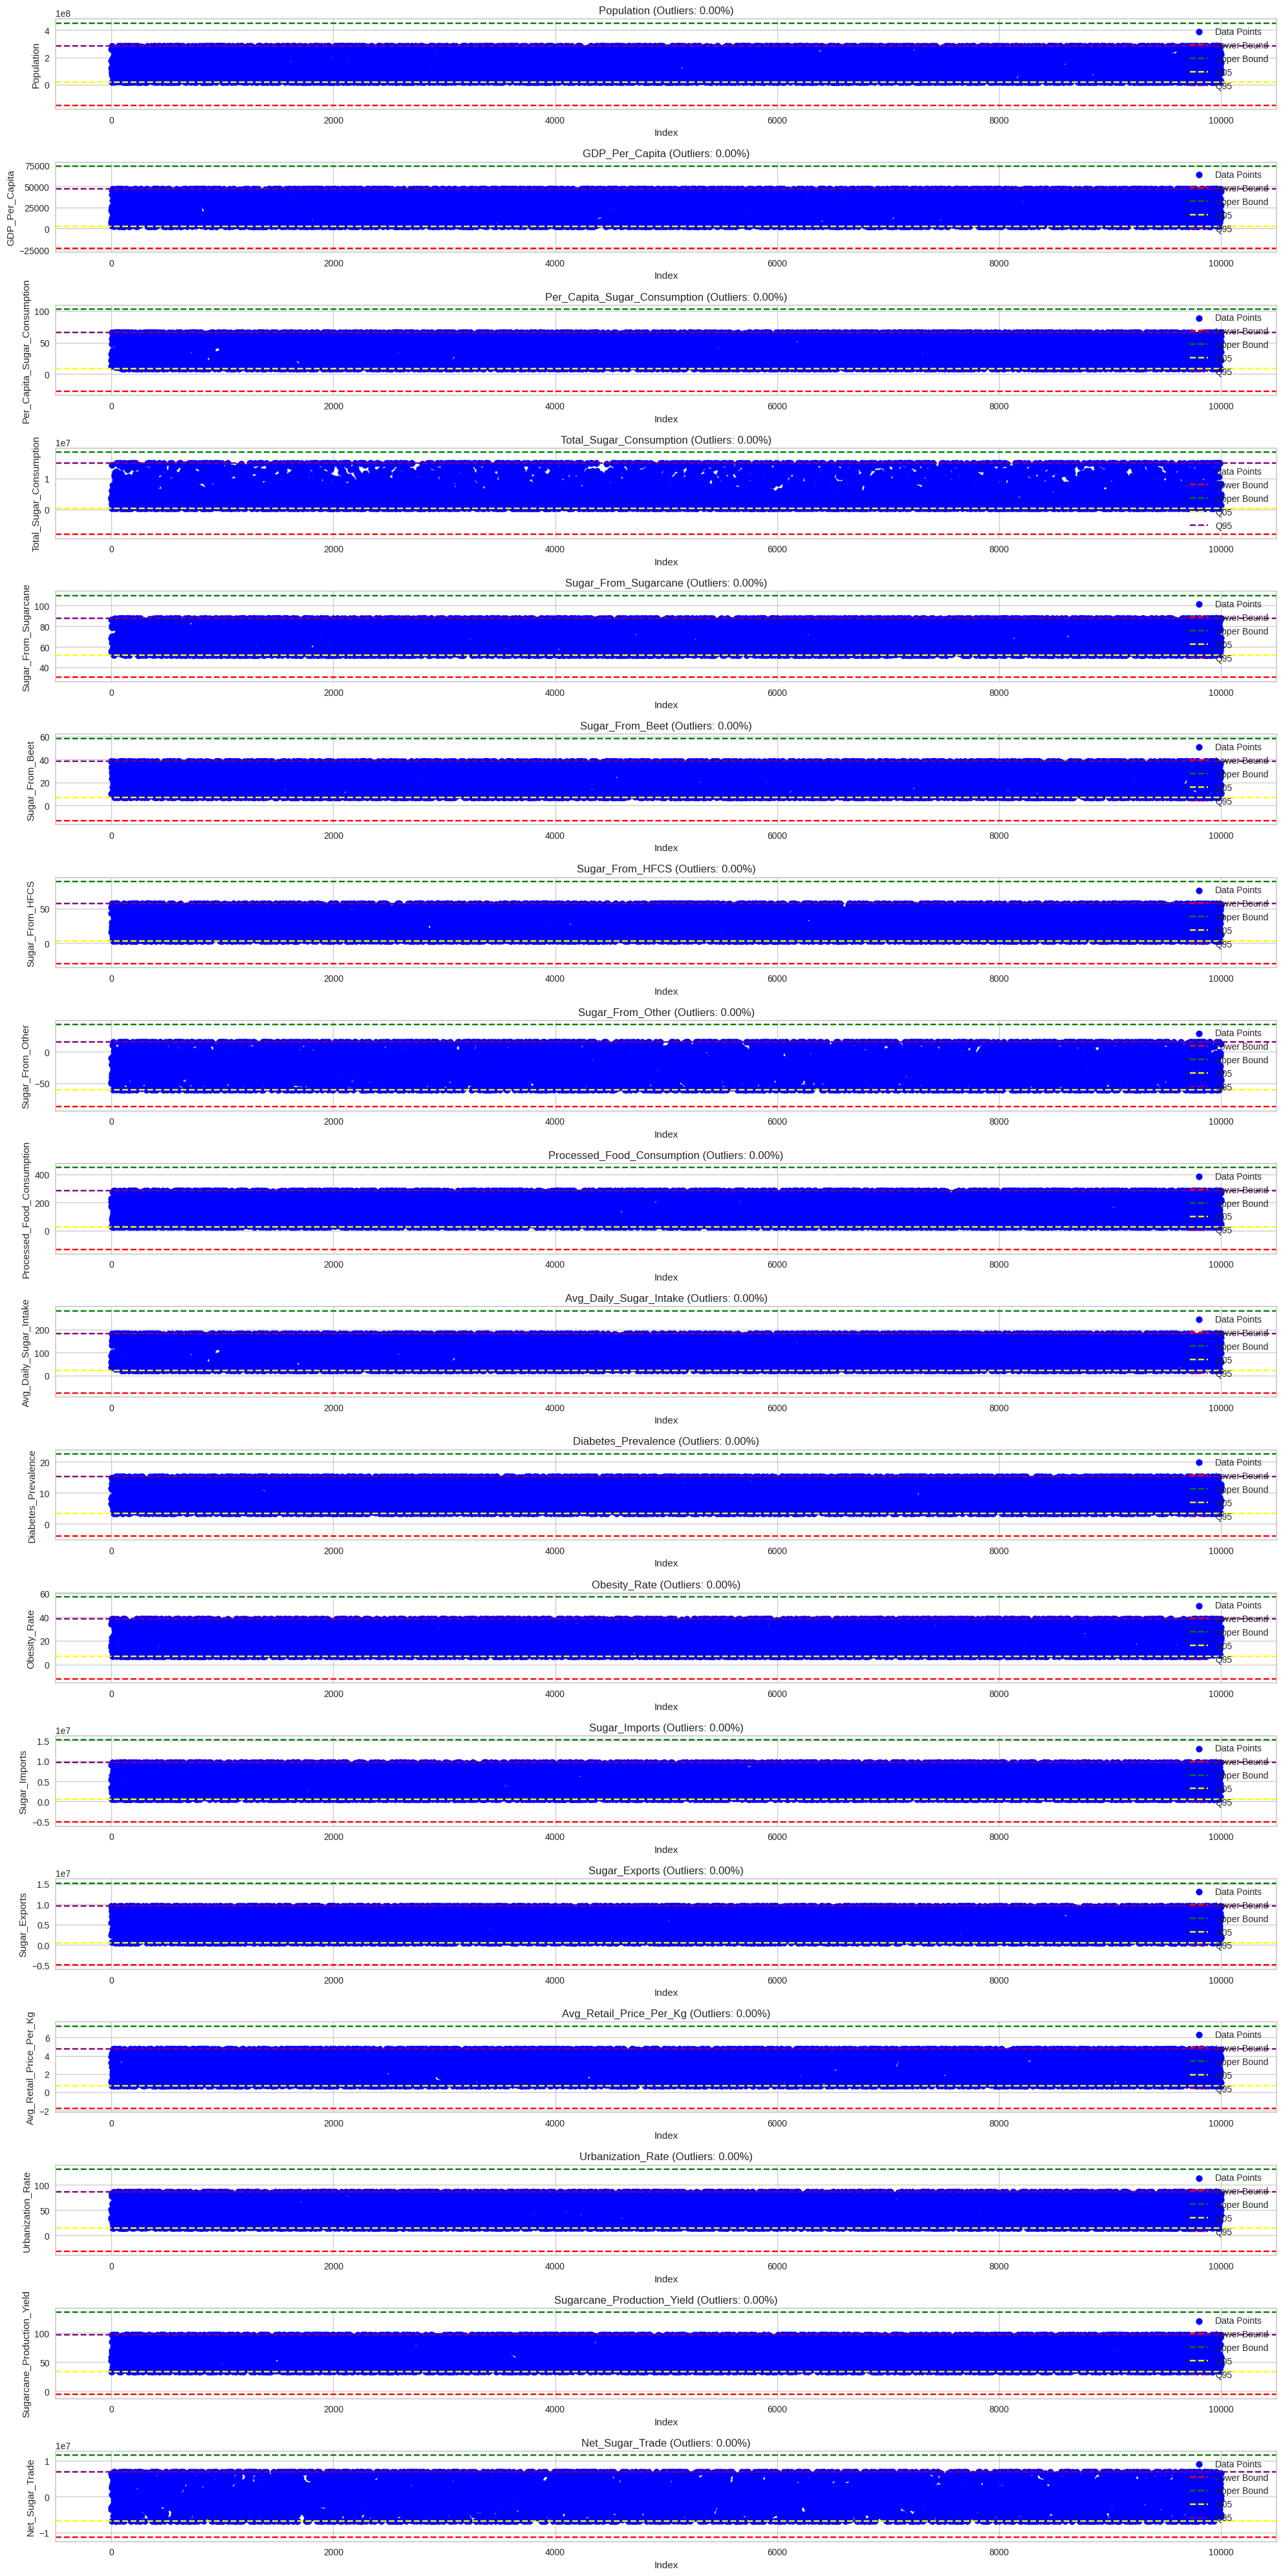

In [28]:
fig, ax = plt.subplots(len(con_columns), 1, figsize=(20, 40))

for i, column in enumerate(con_columns):
    lower_bound, upper_bound, q05, q95 = calculate_iqr_bounds(data_preprocessing[column])

    outlier_mask = (data_preprocessing[column] < lower_bound) | (data_preprocessing[column] > upper_bound)
    n_outliers = outlier_mask.sum()
    total = len(data_preprocessing[column])
    percent_outliers = (n_outliers / total) * 100

    ax[i].scatter(data_preprocessing.index, data_preprocessing[column], color='blue', label='Data Points')

    ax[i].axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
    ax[i].axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')
    ax[i].axhline(y=q05, color='yellow', linestyle='--', label='Q05')
    ax[i].axhline(y=q95, color='purple', linestyle='--', label='Q95')

    ax[i].set_title(f"{column} (Outliers: {percent_outliers:.2f}%)")
    ax[i].set_xlabel('Index')
    ax[i].set_ylabel(column)

    ax[i].legend()

plt.tight_layout()
plt.show()

## **Normalisasi atau Standarisasi Fitur**

In [29]:
scaler = StandardScaler()
data_pre_scaled = scaler.fit_transform(data_preprocessing)

data_pre_scaled = pd.DataFrame(data_pre_scaled, columns=data_preprocessing.columns, index=data_preprocessing.index)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### **K-Means**

In [30]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

### **DBSCAN**

In [31]:
min_samples_range = range(2, 100, 5)
eps_value = 0.5
sil_scores = []
n_clusters_list = []

for min_samp in min_samples_range:
    clusterer = DBSCAN(eps=eps_value, min_samples=min_samp)
    labels = clusterer.fit_predict(data_pre_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_clusters_list.append(n_clusters)

    if n_clusters > 1:
        mask = labels != -1
        if np.sum(mask) > 0:
            score = silhouette_score(data_pre_scaled[mask], labels[mask])
            sil_scores.append(score)
        else:
            sil_scores.append(np.nan)
    else:
        sil_scores.append(np.nan)
        print("Tidak Ada Cluster Yang Terbentuk!")

Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!
Tidak Ada Cluster Yang Terbentuk!


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [32]:
def calculate_silhouette(labels, data):
    mask = labels != -1
    if len(np.unique(labels[mask])) < 2:
        return 999
    else:
        return silhouette_score(data[mask], labels[mask])

### **Hasil K-Means**

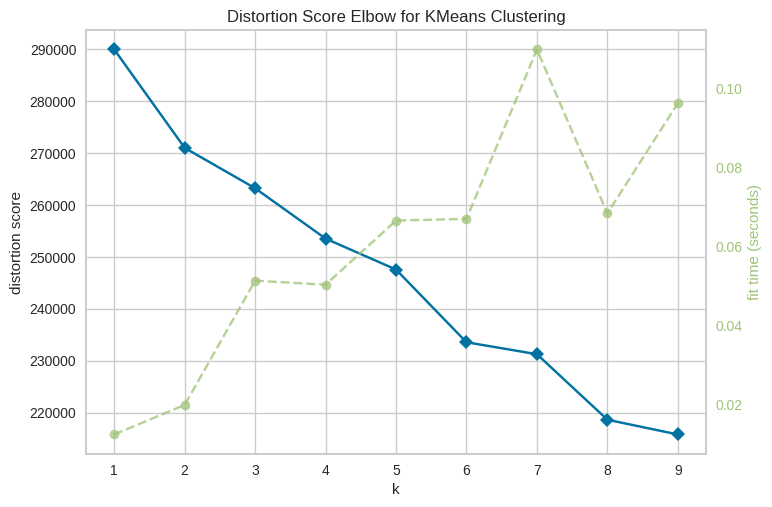

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
visualizer.fit(data_pre_scaled)
visualizer.show()

In [34]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_pre_scaled)

In [35]:
kmeans_silhouette = calculate_silhouette(kmeans_labels, data_pre_scaled)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

K-Means Silhouette Score: 0.0791


### **Hasil DSBCAN**

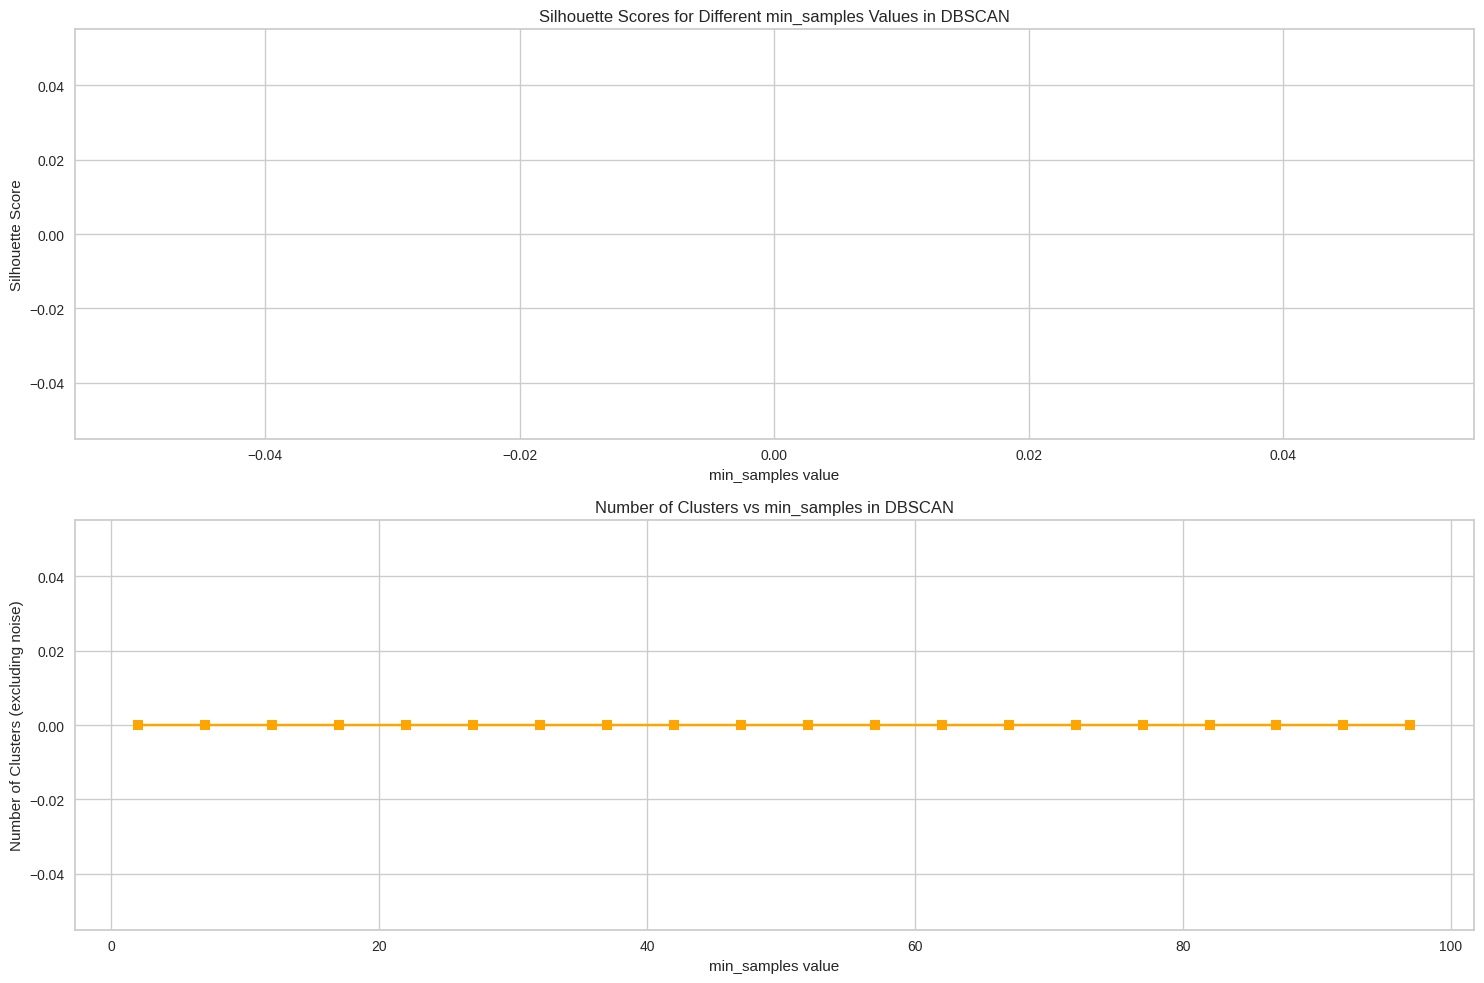

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot silhouette scores
axs[0].plot(list(min_samples_range), sil_scores, marker='o', color='blue', linestyle='-')
axs[0].set_xlabel("min_samples value")
axs[0].set_ylabel("Silhouette Score")
axs[0].set_title("Silhouette Scores for Different min_samples Values in DBSCAN")
axs[0].grid(True)

# Plot number of clusters
axs[1].plot(list(min_samples_range), n_clusters_list, marker='s', color='orange', linestyle='-')
axs[1].set_xlabel("min_samples value")
axs[1].set_ylabel("Number of Clusters (excluding noise)")
axs[1].set_title("Number of Clusters vs min_samples in DBSCAN")
axs[1].grid(True)

plt.tight_layout()
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### **Domain Knowledge**

> Pemilihan fitur berdasarkan pemahaman domain dan hipotesis tentang apa yang mungkin berpengaruh pada pengelompokan.

In [37]:
# Membuat fitur agregat
data_pre_scaled['Total_Sugar_From_Sources'] = (
    data_pre_scaled['Sugar_From_Sugarcane'] +
    data_pre_scaled['Sugar_From_Beet'] +
    data_pre_scaled['Sugar_From_HFCS'] +
    data_pre_scaled['Sugar_From_Other']
)

In [38]:
data_combination = {
    "features_consumption_health": data_pre_scaled[[
        'Per_Capita_Sugar_Consumption',
        'Avg_Daily_Sugar_Intake',
        'Processed_Food_Consumption',
        'Diabetes_Prevalence',
        'Obesity_Rate',
        'Total_Sugar_Consumption'
    ]],

    "features_sugar_sources": data_pre_scaled[[
        'Sugar_From_Sugarcane',
        'Sugar_From_Beet',
        'Sugar_From_HFCS',
        'Sugar_From_Other',
        'Diabetes_Prevalence',
        'Obesity_Rate'
    ]],

    "features_economic_policy": data_pre_scaled[[
        'GDP_Per_Capita',
        'Avg_Retail_Price_Per_Kg',
        'Gov_Tax',
        'Gov_Subsidies',
        'Education_Campaign',
        'Diabetes_Prevalence',
        'Obesity_Rate'
    ]],

    "features_demographic_geographic": data_pre_scaled[[
        'Population',
        'Urbanization_Rate',
        'Climate_Conditions',
        'Continent_Africa',
        'Continent_Asia',
        'Continent_Europe',
        'Continent_North America',
        'Continent_Oceania',
        'Continent_South America',
        'Diabetes_Prevalence',
        'Obesity_Rate'
    ]],

    "features_aggregated": data_pre_scaled[[
        'Total_Sugar_From_Sources',
        'Avg_Daily_Sugar_Intake',
        'Sugar_Imports',
        'Urbanization_Rate',
        'GDP_Per_Capita',
        'Diabetes_Prevalence',
        'Obesity_Rate'
    ]],

    "features_trade_production": data_pre_scaled[[
        'Sugar_Imports',
        'Sugar_Exports',
        'Net_Sugar_Trade',
        'Sugarcane_Production_Yield',
        'Per_Capita_Sugar_Consumption',
        'Diabetes_Prevalence',
        'Obesity_Rate'
    ]],

    "features_policy_behavior": data_pre_scaled[[
        'Gov_Tax',
        'Gov_Subsidies',
        'Education_Campaign',
        'Per_Capita_Sugar_Consumption',
        'Processed_Food_Consumption',
        'Diabetes_Prevalence'
    ]],

    "features_production_geo": data_pre_scaled[[
        'Sugarcane_Production_Yield',
        'Climate_Conditions',
        'Continent_South America',
        'Continent_Asia',
        'Sugar_Exports',
        'Obesity_Rate'
    ]],

    "features_urban_health": data_pre_scaled[[
        'Urbanization_Rate',
        'GDP_Per_Capita',
        'Avg_Retail_Price_Per_Kg',
        'Education_Campaign',
        'Diabetes_Prevalence',
        'Obesity_Rate'
    ]],

    "features_global_trade": data_pre_scaled[[
        'Sugar_Imports',
        'Sugar_Exports',
        'Net_Sugar_Trade',
        'GDP_Per_Capita',
        'Continent_North America',
        'Continent_Europe'
    ]],

    "feature_demo_sosio": data_pre_scaled[[
        'Population',
        'GDP_Per_Capita',
        'Urbanization_Rate',
        "Education_Campaign"
    ]],

    "feature_sugar_consumption": data_pre_scaled[[
        'Per_Capita_Sugar_Consumption',
        'Avg_Daily_Sugar_Intake',
        'Processed_Food_Consumption',
        'Total_Sugar_Consumption'
    ]],

    "feature_sugar_resource": data_pre_scaled[[
        'Sugar_From_Sugarcane',
        'Sugar_From_Beet',
        'Sugar_From_HFCS',
        'Sugar_From_Other'
    ]]
}

### **Reduksi Dimensi dengan UMAP**

In [39]:
def umap_reduction(data):
    reducer_umap = umap.UMAP(n_neighbors=100, n_components=2, metric='euclidean', n_epochs=100, learning_rate=0.1, init='spectral',
                    min_dist=0.1, spread=1.0, low_memory=False, set_op_mix_ratio=1.0, local_connectivity=1,
                    repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0, random_state=3,
                    angular_rp_forest=False, target_n_neighbors=-1, transform_seed=3, verbose=False, unique=False)

    data_umap = reducer_umap.fit_transform(data_reduksi)

    return data_umap

### **Reduksi Dimensi dengan T-SNE**

In [40]:
def tsne_reduction(data):
    reducer_tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)

    data_tsne = reducer_tsne.fit_transform(data_reduksi)

    return data_tsne

### **Reduksi Dimensi dengan PCA**

In [41]:
def pca_reduction(data):
    reducer_pca = PCA(n_components=2, random_state=42)

    data_pca = reducer_pca.fit_transform(data)

    return data_pca

### **Pipeline Feature Selection**

In [42]:
def train_dbscan(data, eps=0.5, min_samples=5):

    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(data)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:
        silhouette = silhouette_score(data, labels)
    else:
        silhouette = -1
    return silhouette, n_clusters, labels

In [43]:
def train_hdbscan(data):

    clusterer = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=5)
    labels = clusterer.fit_predict(data)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:
        silhouette = silhouette_score(data, labels)
    else:
        silhouette = -1

    return silhouette, n_clusters, labels


In [44]:
list_hasil = {}

for var_fe, data_reduksi in data_combination.items():
    list_hasil[var_fe] = {}

    # Umap
    data_umap = umap_reduction(data_reduksi)

    umap_silhouette_db, umap_n_cluster_db, _ = train_dbscan(data_umap)
    list_hasil[var_fe]['umap_silhouette_db'] = umap_silhouette_db
    list_hasil[var_fe]['umap_n_cluster_db'] = umap_n_cluster_db

    umap_silhouette_hdbscan, umap_n_cluster_hdbscan, _ = train_hdbscan(data_umap)
    list_hasil[var_fe]['umap_silhouette_hdbscan'] = umap_silhouette_hdbscan
    list_hasil[var_fe]['umap_n_cluster_hdbscan'] = umap_n_cluster_hdbscan

    # T-SNE
    data_tsne = tsne_reduction(data_reduksi)

    tsne_silhouette_db, tsne_n_cluster_db, _ = train_dbscan(data_tsne)
    list_hasil[var_fe]['tsne_silhouette_db'] = tsne_silhouette_db
    list_hasil[var_fe]['tsne_n_cluster_db'] = tsne_n_cluster_db

    tsne_silhouette_hdbscan, tsne_n_cluster_hdbscan, _ = train_hdbscan(data_tsne)
    list_hasil[var_fe]['tsne_silhouette_hdbscan'] = tsne_silhouette_hdbscan
    list_hasil[var_fe]['tsne_n_cluster_hdbscan'] = tsne_n_cluster_hdbscan

    # PCA
    data_pca = pca_reduction(data_reduksi)

    pca_silhouette_db, pca_n_cluster_db, _ = train_dbscan(data_pca)
    list_hasil[var_fe]['pca_silhouette_db'] = pca_silhouette_db
    list_hasil[var_fe]['pca_n_cluster_db'] = pca_n_cluster_db

    pca_silhouette_hdbscan, pca_n_cluster_hdbscan, _ = train_hdbscan(data_pca)
    list_hasil[var_fe]['pca_silhouette_hdbscan'] = pca_silhouette_hdbscan
    list_hasil[var_fe]['pca_n_cluster_hdbscan'] = pca_n_cluster_hdbscan

    print(f"Selesai {var_fe}")

Selesai features_consumption_health
Selesai features_sugar_sources
Selesai features_economic_policy
Selesai features_demographic_geographic
Selesai features_aggregated
Selesai features_trade_production
Selesai features_policy_behavior
Selesai features_production_geo
Selesai features_urban_health
Selesai features_global_trade
Selesai feature_demo_sosio
Selesai feature_sugar_consumption
Selesai feature_sugar_resource


In [45]:
df_fs_result = pd.DataFrame.from_dict(list_hasil)
df_fs_result

features_consumption_health  features_sugar_sources  \
umap_silhouette_db                         -1.000000               -1.000000   
umap_n_cluster_db                           1.000000                1.000000   
umap_silhouette_hdbscan                    -0.070310               -0.091712   
umap_n_cluster_hdbscan                      2.000000               21.000000   
tsne_silhouette_db                         -0.794178               -0.791718   
tsne_n_cluster_db                         108.000000              113.000000   
tsne_silhouette_hdbscan                    -0.136318               -0.041936   
tsne_n_cluster_hdbscan                      2.000000               12.000000   
pca_silhouette_db                          -1.000000               -1.000000   
pca_n_cluster_db                            1.000000                1.000000   
pca_silhouette_hdbscan                     -0.103588                0.091613   
pca_n_cluster_hdbscan                       2.000000                2.000000   

                         features_economic_policy  \
umap_silhouette_db                       0.639882   
umap_n_cluster_db                        8.000000   
umap_silhouette_hdbscan                  0.639882   
umap_n_cluster_hdbscan                   8.000000   
tsne_silhouette_db                      -0.630838   
tsne_n_cluster_db                      303.000000   
tsne_silhouette_hdbscan                  0.244090   
tsne_n_cluster_hdbscan                   9.000000   
pca_silhouette_db                       -1.000000   
pca_n_cluster_db                         1.000000   
pca_silhouette_hdbscan                  -0.143376   
pca_n_cluster_hdbscan                    3.000000   

                         features_demographic_geographic  features_aggregated  \
umap_silhouette_db                              0.694148            -1.000000   
umap_n_cluster_db                               6.000000             1.000000   
umap_silhouette_hdbscan                         0.694148            -0.163564   
umap_n_cluster_hdbscan                          6.000000            10.000000   
tsne_silhouette_db                             -0.683292            -0.807373   
tsne_n_cluster_db                             258.000000            38.000000   
tsne_silhouette_hdbscan                         0.471152            -0.121461   
tsne_n_cluster_hdbscan                          6.000000            12.000000   
pca_silhouette_db                               0.914062            -1.000000   
pca_n_cluster_db                                4.000000             1.000000   
pca_silhouette_hdbscan                          0.914062            -0.016103   
pca_n_cluster_hdbscan                           4.000000             2.000000   

                         features_trade_production  features_policy_behavior  \
umap_silhouette_db                       -1.000000                  0.586064   
umap_n_cluster_db                         1.000000                  8.000000   
umap_silhouette_hdbscan                  -0.089216                  0.586064   
umap_n_cluster_hdbscan                    2.000000                  8.000000   
tsne_silhouette_db                       -0.807617                 -0.505326   
tsne_n_cluster_db                        51.000000                405.000000   
tsne_silhouette_hdbscan                  -0.139598                  0.308970   
tsne_n_cluster_hdbscan                    2.000000                 20.000000   
pca_silhouette_db                        -1.000000                  0.318590   
pca_n_cluster_db                          1.000000                  3.000000   
pca_silhouette_hdbscan                   -0.267271                  0.257591   
pca_n_cluster_hdbscan                     7.000000                  5.000000   

                         features_production_geo  features_urban_health  \
umap_silhouette_db                      0.566757               0.670697   
umap_n_cluster_db                       4.000000 

### **Hyperparameter Tuning**

> Kombinasi ini dipilih karena memiliki silhoute yang cukup tinggi tapi clusternya cukup rendah. Artinya model tidak melakukan over clustering yang membuat nilai silhoute tinggi. Target utamanya adalah mencapai nilai diatas 0.70 dan saya mencoba untuk mendapatkan cluster dibawah 10.


In [46]:
data_pca = pca_reduction(data_combination['features_demographic_geographic'])
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

In [47]:
def objective(trial):
    eps = trial.suggest_float('eps', 0.1, 3.0)
    min_samples = trial.suggest_int('min_samples', 2, 100)
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'chebyshev', 'minkowski'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    leaf_size = trial.suggest_int('leaf_size', 10, 50)
    p = trial.suggest_float('p', 1, 5) if metric == 'minkowski' else None

    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, algorithm=algorithm, leaf_size=leaf_size, p=p)
    clusters = dbscan.fit_predict(data_pca)

    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

    if n_clusters < 2:
        return -1, float('inf')

    silhouette = silhouette_score(data_pca, clusters)

    return silhouette, n_clusters

study = optuna.create_study(directions=['maximize', 'minimize'])
study.optimize(objective, n_trials=50)

[I 2025-04-13 03:51:13,617] A new study created in memory with name: no-name-455cbcc3-5006-4fa0-8662-ec9c5aec303d
[I 2025-04-13 03:51:14,202] Trial 0 finished with values: [-1.0, inf] and parameters: {'eps': 1.8837121909947414, 'min_samples': 45, 'metric': 'chebyshev', 'algorithm': 'ball_tree', 'leaf_size': 44}.
[I 2025-04-13 03:51:16,005] Trial 1 finished with values: [0.9140618383248946, 4.0] and parameters: {'eps': 0.22375757766136095, 'min_samples': 20, 'metric': 'euclidean', 'algorithm': 'kd_tree', 'leaf_size': 11}.
[I 2025-04-13 03:51:16,754] Trial 2 finished with values: [-1.0, inf] and parameters: {'eps': 1.943165172059637, 'min_samples': 20, 'metric': 'chebyshev', 'algorithm': 'ball_tree', 'leaf_size': 31}.
[I 2025-04-13 03:51:18,411] Trial 3 finished with values: [0.9140618383248946, 4.0] and parameters: {'eps': 0.509351840594842, 'min_samples': 86, 'metric': 'manhattan', 'algorithm': 'auto', 'leaf_size': 46}.
[I 2025-04-13 03:51:20,374] Trial 4 finished with values: [0.61731

In [48]:
hyperparameter_tuning_result = []

for trial in study.best_trials:
    trial_data = {
        'objective_1': trial.values[0],
        'objective_2': trial.values[1],
        **trial.params
    }
    hyperparameter_tuning_result.append(trial_data)

df_hasil_hyper = pd.DataFrame(hyperparameter_tuning_result)

In [49]:
df_hasil_hyper.sort_values(by='objective_1', ascending=False)[df_hasil_hyper['objective_2'] <= 4].head(10)

objective_1  objective_2       eps  min_samples     metric  algorithm  \
0      0.914062          4.0  0.223758           20  euclidean    kd_tree   
1      0.914062          4.0  0.509352           86  manhattan       auto   
5      0.914062          4.0  0.416136           51  chebyshev    kd_tree   
13     0.914062          4.0  0.155002           68  manhattan  ball_tree   
22     0.914062          4.0  0.341046           88  manhattan      brute   
19     0.914062          4.0  0.365972           19  chebyshev      brute   
16     0.914062          4.0  0.374999           22  manhattan    kd_tree   
29     0.914062          4.0  0.142947           18  manhattan  ball_tree   
30     0.914062          4.0  0.382508           87  chebyshev      brute   
27     0.914062          4.0  0.108292            5  manhattan    kd_tree   

    leaf_size   p  
0          11 NaN  
1          46 NaN  
5          34 NaN  
13         33 NaN  
22         41 NaN  
19         11 NaN  
16         43 NaN  
29         41 NaN  
30         18 NaN  
27         16 NaN

### **Final Training**
> Saya memilih menggunakan parameter yang menghasilkan n_cluster 5 dengan silhoute 0.70 agar proses klasifikasi lebih optimal dengan asumsi bahwa data setiap kelas akan lebih banyak karena jumlah cluster sangat minim tapi nilai silhoute tetap tinggi.

In [50]:
dbscan = DBSCAN(eps=0.188437, min_samples=7, metric='euclidean', algorithm='auto', leaf_size=29)
dbscan_labels = dbscan.fit_predict(data_pca)

In [51]:
dbscan_silhouette = calculate_silhouette(dbscan_labels, data_pca)
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
print(f"N-Cluster: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")

DBSCAN Silhouette Score: 0.9141
N-Cluster: 4


### **Membandingkan Hasil Pelatihan**
> Pada bagian awal, telah dicoba untuk melatih model DBSCAN dengan menggunakan semua fitur data. Setelah dilatih, hasilnya tidak ada cluster yang terbentuk dari semua min_samples yang telah dicoba. Hal ini juga membuat silhoute-score tidak bisa dihitung. Selain itu, model K-means juga dicoba dengan skema yang sama, tapi hasilnya juga tidak optimal dimana silhoute_score hanya mencapai 0.0272 dengan jumlah 6 cluster.

> Setelah melakukan final traning, hasilnya lebih baik dengan silhoute score mencapai 0.7097 dan menghasilkan 5 cluster. Dapat disimpulkan bahwa model tidak melakukan overclustering.


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [52]:
centroids = []
for label in dbscan_labels:
    indices = np.where(dbscan_labels == label)
    centroid = np.mean(data_pca[indices], axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)

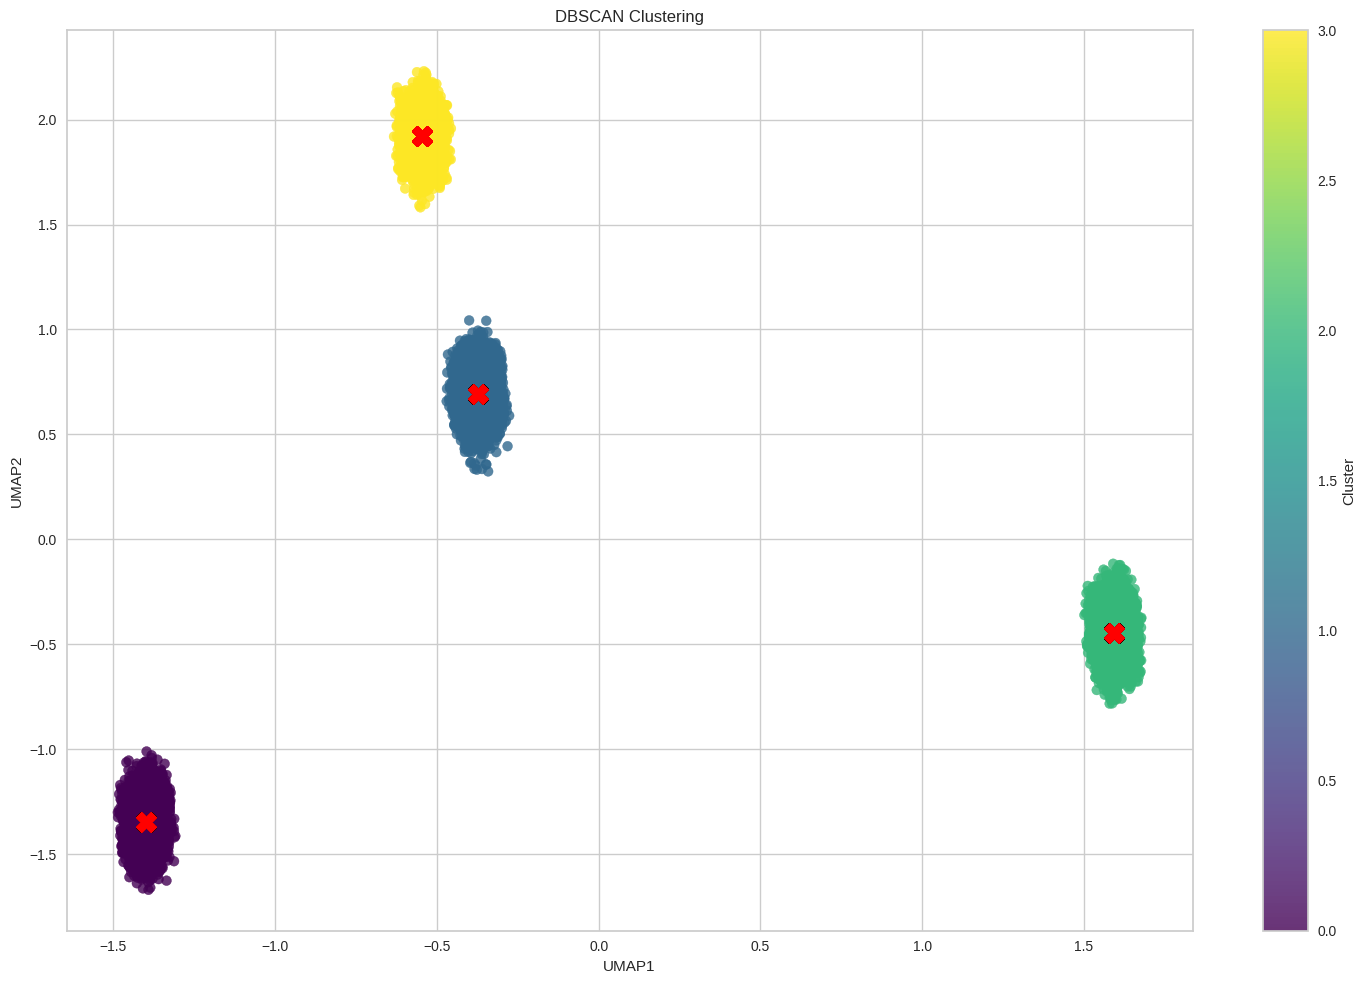

In [53]:
plt.figure(figsize=(15, 10))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter, label='Cluster')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroid')
plt.title(f'DBSCAN Clustering')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [54]:
# Proses menggabungkan data PCA dengan data preprocessing (data sebelum scaling)
data_pca_df['Cluster'] = dbscan_labels

clustered_df = pd.concat([data_preprocessing, data_pca_df], axis=1)

In [55]:
data_preprocessing

Year    Population  GDP_Per_Capita  Per_Capita_Sugar_Consumption  \
0     1972  2.617306e+08     8692.631696                     12.827741   
1     2003  1.737965e+08     6859.195960                     21.362632   
2     1963  1.236366e+08    22075.950575                     32.077485   
3     1965  2.844034e+08     3728.027392                     47.648930   
4     2010  1.594127e+07    40420.973962                     23.214343   
...    ...           ...             ...                           ...   
9995  2013  1.577296e+08    13292.772553                     52.082820   
9996  1997  8.194828e+07    15062.553443                     59.947295   
9997  1968  2.211798e+08    44077.744031                     21.447386   
9998  2020  1.089609e+08    19327.592671                     35.558519   
9999  1990  2.118221e+07    28039.986398                     66.420947   

      Total_Sugar_Consumption  Sugar_From_Sugarcane  Sugar_From_Beet  \
0                3.357413e+06             68.422963        38.269217   
1                3.712750e+06             55.432564        38.269217   
2                3.965951e+06             86.466120        10.001416   
3                1.424685e+07             69.806707        34.005173   
4                3.929420e+05             63.772278        23.105924   
...                       ...                   ...              ...   
9995             8.215000e+06             68.735289        10.053102   
9996             4.912577e+06             87.845967        29.289476   
9997             4.743729e+06             60.228450        28.265050   
9998             3.874488e+06             87.845967        17.601876   
9999             1.429183e+06             64.568766        10.676052   

      Sugar_From_HFCS  Sugar_From_Other  Processed_Food_Consumption  ...  \
0           42.970760        -49.994107                  171.966182  ...   
1           16.223681        -10.119866                  229.238022  ...   
2           51.720631        -48.188167                  203.263252  ...   
3           43.573774        -47.385654                   34.177283  ...   
4           53.543595        -40.421797                   78.733482  ...   
...               ...               ...                         ...  ...   
9995        54.397642        -33.186033                  220.761767  ...   
9996        37.971289        -57.021414                  210.225061  ...   
9997        55.922038        -44.415537                  270.853144  ...   
9998        39.798719        -46.551895                   47.974177  ...   
9999        12.507921         12.247261                   32.441262  ...   

      Urbanization_Rate  Climate_Conditions  Sugarcane_Production_Yield  \
0             34.503398                   3                   52.433972   
1             31.783067                   4                   58.382055   
2             51.551345                   1                   33.730783   
3             80.386281                   2                   84.296019   
4             49.701153                   3                   66.110815   
...                 ...                 ...                         ...   
9995          70.297948                   5                   50.874135   
9996          82.951511                   5                   49.170137   
9997          80.478768                   5                   56.414707   
9998          50.138593                   4                   44.818364   
9999          39.748626                   1                   58.549719   

      Net_Sugar_Trade  Continent_Africa  Continent_Asia  Continent_Europe  \
0       -3.042741e+06                 0               0                 1   
1        6.275558e+06                 0               0                 0   
2       -3.535649e+06                 0               0                 1   
3        2.869496e+06                 0               0                 1   
4        5.994716e+05                 0              

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

### **Agregasi Data Setiap Cluster**

In [56]:
clustered_df['Cluster'].value_counts()

Cluster
2    3349
1    2521
0    2510
3    1620
Name: count, dtype: int64

In [57]:
def mode(series):
    return series.mode()[0]

agg_funcs = ['mean', 'std', 'min', 'max', mode]
summary = clustered_df.groupby('Cluster')[con_columns].agg(agg_funcs).T

summary

Cluster                          0             1             2             3
Population      mean  1.521166e+08  1.487971e+08  1.506174e+08  1.479437e+08
                std   8.509392e+07  8.558583e+07  8.516159e+07  8.505371e+07
                min   1.594127e+07  1.594127e+07  1.594127e+07  1.594127e+07
                max   2.844034e+08  2.844034e+08  2.844034e+08  2.844034e+08
                mode  2.844034e+08  1.594127e+07  2.844034e+08  1.594127e+07
...                            ...           ...           ...           ...
Net_Sugar_Trade mean  3.225784e+04 -6.062092e+03 -3.420676e+03  1.775817e+05
                std   3.874992e+06  3.816384e+06  3.873326e+06  3.758473e+06
                min  -6.834876e+06 -6.834876e+06 -6.834876e+06 -6.834876e+06
                max   6.843334e+06  6.843334e+06  6.843334e+06  6.843334e+06
                mode -6.834876e+06  6.843334e+06 -6.834876e+06  6.843334e+06

[90 rows x 4 columns]

In [58]:
categorical_features =  ['Gov_Tax', 'Gov_Subsidies', 'Education_Campaign', 'Climate_Conditions',
           'Continent_Africa', 'Continent_Asia', 'Continent_Europe', 'Continent_North America',
           'Continent_Oceania', 'Continent_South America']

for feature in categorical_features:
    freq = pd.crosstab(clustered_df['Cluster'], clustered_df[feature], normalize='index') * 100
    print(f"Distribusi {feature} per cluster (%):")
    print(freq)
    print("\n")

Distribusi Gov_Tax per cluster (%):
Gov_Tax        0.0        1.0
Cluster                      
0        84.581673  15.418327
1        85.481952  14.518048
2        85.637504  14.362496
3        87.962963  12.037037


Distribusi Gov_Subsidies per cluster (%):
Gov_Subsidies          0          1
Cluster                            
0              70.836653  29.163347
1              70.210234  29.789766
2              69.752165  30.247835
3              70.432099  29.567901


Distribusi Education_Campaign per cluster (%):
Education_Campaign        0.0        1.0
Cluster                                 
0                   62.868526  37.131474
1                   61.404205  38.595795
2                   60.644969  39.355031
3                   60.802469  39.197531


Distribusi Climate_Conditions per cluster (%):
Climate_Conditions          1          2          3          4          5
Cluster                                                                  
0                   20.199203  2

**Cluster 1 (N = 2.510)**

- **Kebijakan Gula:**  
  - **Gov_Tax (Pajak Gula):**  
    - Tidak: 84,58% (Mayoritas negara tidak memberlakukan pajak gula)  
    - Ya: 15,42%  
  - **Gov_Subsidies (Subsidi Gula):**  
    - Tidak: 70,84% (Sebagian besar tidak memberikan subsidi gula)  
    - Ya: 29,16%  
  - **Education_Campaign (Kampanye Edukasi):**  
    - Tidak: 62,87% (Kampanye edukasi terkait gula kurang aktif)  
    - Ya: 37,13%

- **Kondisi Iklim:**  
  - Distribusi pada lima tingkat (Level 1 hingga Level 5) hampir merata, sehingga tidak ada pola khusus yang mendominasi.

- **Ekonomi:**  
  - **Populasi:**  
    - Rata-rata: 152.116.562  
    - Rentang: 15.941.266 – 284.403.369  
    - Mode: 284.403.369  
  - **GDP Per Capita:**  
    - Rata-rata: 25.463,82  
    - Rentang: 2.981,31 – 47.463,75  
    - Mode: 47.463,75

- **Geografis:**  
  - Seluruh negara di cluster ini berasal dari **Eropa**.

*Interpretasi:*  
Negara‑negara di Cluster 1 (Eropa) umumnya tidak memberlakukan pajak gula dan tidak memberikan subsidi gula. Kampanye edukasi mengenai gula pun kurang aktif. Dari sisi ekonomi, negara‑negara ini memiliki populasi besar dan GDP per Kapita yang relatif tinggi—menunjukkan potensi ekonomi yang kuat. Variasi kondisi iklim yang sebarannya hampir merata tidak menjadi faktor penentu utama segmentasi.

---

**Cluster 2 (N = 2.521)**  

- **Kebijakan Gula:**  
  - **Gov_Tax (Pajak Gula):**  
    - Tidak: 85,48%  
    - Ya: 14,52%  
  - **Gov_Subsidies (Subsidi Gula):**  
    - Tidak: 70,21%  
    - Ya: 29,79%  
  - **Education_Campaign (Kampanye Edukasi):**  
    - Tidak: 61,40%  
    - Ya: 38,60%

- **Kondisi Iklim:**  
  - Distribusi kondisi iklim hampir merata (kisaran 19,6% hingga 20,8% untuk tiap level), menunjukkan variasi tanpa dominasi tingkat tertentu.

- **Ekonomi:**  
  - **Populasi:**  
    - Rata-rata: 148.797.131  
    - Rentang: 15.941.266 – 284.403.369  
    - Mode: 15.941.266  
  - **GDP Per Capita:**  
    - Rata-rata: 25.221,61  
    - Rentang: 2.981,31 – 47.463,75  
    - Mode: 47.463,75

- **Geografis:**  
  - Cluster 2 merupakan gabungan negara dengan karakteristik regional campuran, yang terdiri dari:  
    - 32,37% negara berasal dari **Afrika**  
    - 36,37% negara berasal dari **Oseania**  
    - 31,26% negara berasal dari **Amerika Selatan**

*Interpretasi:*  
Negara‑negara di Cluster 2 cenderung memiliki pola kebijakan gula yang mirip dengan Cluster 1, namun dengan sedikit perbedaan pada proporsi subsidi dan kampanye edukasi yang menunjukkan partisipasi sedikit lebih tinggi. Secara ekonomi, meskipun populasi rata‑rata sedikit lebih rendah dibandingkan Cluster 1, GDP per Kapita tetap hampir sama. Keberagaman geografis menunjukkan bahwa negara‑negara dalam cluster ini berasal dari berbagai benua, sehingga menghadirkan konteks dan tantangan kebijakan gula yang lebih heterogen.

---

**Cluster 3 (N = 3.349)**  

- **Kebijakan Gula:**  
  - **Gov_Tax (Pajak Gula):**  
    - Tidak: 85,64%  
    - Ya: 14,36%  
  - **Gov_Subsidies (Subsidi Gula):**  
    - Tidak: 69,75%  
    - Ya: 30,25%  
  - **Education_Campaign (Kampanye Edukasi):**  
    - Tidak: 60,64%  
    - Ya: 39,36%

- **Kondisi Iklim:**  
  - Distribusi kondisi iklim di kelima tingkat cukup seimbang, tanpa adanya dominasi pada level tertentu.

- **Ekonomi:**  
  - **Populasi:**  
    - Rata-rata: 150.617.411  
    - Rentang: 15.941.266 – 284.403.369  
    - Mode: 284.403.369  
  - **GDP Per Capita:**  
    - Rata-rata: 24.971,73  
    - Rentang: 2.981,31 – 47.463,75  
    - Mode: 2.981,31

- **Geografis:**  
  - Seluruh negara di Cluster 3 berasal dari **Asia**.

*Interpretasi:*  
Meskipun pola kebijakan gula di Cluster 3 serupa—hampir 86% negara tidak mengenakan pajak gula dan sebagian kecil memberlakukan subsidi—terdapat kecenderungan yang sedikit lebih tinggi dalam penerapan subsidi dan kampanye edukasi. Dari sisi ekonomi, GDP per Kapita sedikit lebih rendah, yang dapat mengindikasikan beberapa tantangan ekonomi di wilayah ini. Keunikan Cluster 3 adalah bahwa seluruh negara berasal dari Asia, sehingga konteks kebijakan gula dan tantangan ekonominya mungkin berbeda secara regional.

---

**Cluster 4 (N = 1.620)**  

- **Kebijakan Gula:**  
  - **Gov_Tax (Pajak Gula):**  
    - Tidak: 87,96%  
    - Ya: 12,04%  
  - **Gov_Subsidies (Subsidi Gula):**  
    - Tidak: 70,43%  
    - Ya: 29,57%  
  - **Education_Campaign (Kampanye Edukasi):**  
    - Tidak: 60,80%  
    - Ya: 39,20%

- **Kondisi Iklim:**  
  - Distribusi kondisi iklim menunjukkan kecenderungan yang sedikit berbeda dengan dominasi pada level 1 (21,67%), sementara persentase pada level 4 dan 5 lebih rendah.

- **Ekonomi:**  
  - **Populasi:**  
    - Rata-rata: 147.943.742  
    - Rentang: 15.941.266 – 284.403.369  
    - Mode: 15.941.266  
  - **GDP Per Capita:**  
    - Rata-rata: 25.474,48  
    - Rentang: 2.981,31 – 47.463,75  
    - Mode: 2.981,31

- **Geografis:**  
  - Seluruh negara di Cluster 4 berasal dari **Amerika Utara**.

*Interpretasi:*  
Negara‑negara di Cluster 4 menunjukkan kecenderungan untuk tidak memberlakukan pajak gula secara lebih kuat (lebih dari 87% memilih "tidak"), sedangkan pola subsidi dan kampanye edukasi relatif serupa dengan cluster lainnya. Perbedaan terletak pada distribusi kondisi iklim yang sedikit berbeda dengan kecenderungan pada level 1, yang bisa mencerminkan karakteristik iklim khusus di Amerika Utara. Meskipun nilai ekonomi seperti populasi dan GDP per Kapita serupa dengan cluster lain, asal geografis yang unik menandakan adanya konteks kebijakan dan kondisi ekonomi yang khas di wilayah ini.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [61]:
clustered_df.to_csv("Dataset_clustering.csv", index=False)